# Setup

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

%cd /content/gdrive/My\ Drive/TESIS/autism-master/

Mounted at /content/gdrive/
/content/gdrive/My Drive/TESIS/autism-master


In [2]:
%%capture
import os
import pandas as pd 
import numpy as np
from scipy import sparse
!pip install pingouin
import pingouin as pg
!pip install git+https://github.com/paris-saclay-cds/ramp-workflow
from problem import get_train_data
from download_data import fetch_fmri_time_series
!pip install ripser
from ripser import ripser
from persim import plot_diagrams
!pip install tensorflow_addons  
!pip install gudhi
import pickle as pkl
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit
from tensorflow import random_uniform_initializer as rui
import gudhi.representations as tda
import tensorflow as tf
import os.path
import itertools
import h5py
import tensorflow_addons  as tfa
import gudhi              as gd
from scipy.sparse           import csgraph
from scipy.io               import loadmat
from scipy.linalg           import eigh
from sklearn.preprocessing  import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
# Reduccion dimensionalidad
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
!pip install git+https://github.com/MathieuCarriere/perslay
!pip install git+https://github.com/MathieuCarriere/sklearn-tda
from perslay import PerslayModel
from scipy.stats import beta
!pip install nilearn
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt


In [3]:
path = 'train/prueba_semana26/train_ids_labs.pkl'
with open(path, 'rb') as handle:
    ids_labs = pkl.load(handle)

In [4]:
train_labels = ids_labs['label'].tolist()
labels_train = ids_labs['label'].tolist()

In [5]:
tipo_mat = 'tangent'#['correlation', 'partial correlation', 'tangent']
tipo_dist = 'cosine'#['cosine', 'dynamic']
parc_id = 'fmri_basc197'

path = 'train/prueba_semana26/train_dgms_' + tipo_mat + '_' + tipo_dist +'_' + parc_id + '.pkl'
with open(path, 'rb') as handle:
    dgms = pkl.load(handle)

# Entropy y Betti Curves tryout

Given a persistence diagram consisting of birth-death-dimension triples [b, d, q], subdiagrams corresponding to distinct homology dimensions are considered separately, and their respective persistence entropies are calculated as the (base 2) Shannon entropies of the collections of differences d - b (“lifetimes”), normalized by the sum of all such differences.

In [ ]:
# calculate its entropy first
# program entropy thresholder
!pip install giotto-tda

In [62]:
import gtda.diagrams as gtd

In [ ]:
complete_diagram =  np.vstack((np.hstack((dgms[0][0], [[0]]*len(dgms[0][0]))),np.hstack((dgms[0][1], [[1]]*len(dgms[0][1])))))

In [ ]:
[complete_diagram, complete_diagram,complete_diagram]

[array([[1.41361785,        inf, 0.        ],
        [1.40616167, 1.40626276, 1.        ],
        [1.4054507 , 1.40588713, 1.        ],
        ...,
        [1.3885808 , 1.40179896, 1.        ],
        [1.38843894, 1.39158285, 1.        ],
        [1.38812709, 1.3897922 , 1.        ]]),
 array([[1.41361785,        inf, 0.        ],
        [1.40616167, 1.40626276, 1.        ],
        [1.4054507 , 1.40588713, 1.        ],
        ...,
        [1.3885808 , 1.40179896, 1.        ],
        [1.38843894, 1.39158285, 1.        ],
        [1.38812709, 1.3897922 , 1.        ]]),
 array([[1.41361785,        inf, 0.        ],
        [1.40616167, 1.40626276, 1.        ],
        [1.4054507 , 1.40588713, 1.        ],
        ...,
        [1.3885808 , 1.40179896, 1.        ],
        [1.38843894, 1.39158285, 1.        ],
        [1.38812709, 1.3897922 , 1.        ]])]

In [ ]:
entropy = gtd.PersistenceEntropy()
entropy.fit_transform([complete_diagram, complete_diagram,complete_diagram])

array([[-1.        ,  9.00777508],
       [-1.        ,  9.00777508],
       [-1.        ,  9.00777508]])

In [ ]:
curves = gtd.BettiCurve()
curvas = curves.fit_transform(diags)

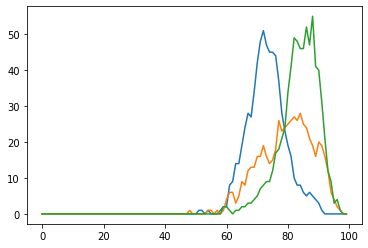

In [ ]:
plt.plot(curvas[1][1])
plt.plot(curvas[0][1])
plt.plot(curvas[2][1])

# Entropy filter (desarrollo)

In [ ]:
# calcular entropia
diagram = dgms[0][1]

def sort_entropy_diagram(diagram, maxlen=2):
  '''
  Esta función toma un diagrama de persistencia, para un nivel de homología solo (cualquiera)
  devuelve el diagrama ordenado de forma ascendiente según sus lifetimes, en forma de ndarray
  de shape (n_points, 3), donde cada punto es un triple [b,d,d-b]
  Devuelve el largo total de los intervalos (un número) (S)
  y la entropía de los diagramas
  '''
  ents = []
  for i in range(len(diagram)):
    if diagram[i][1] != np.inf:
      entry = diagram[i][1]-diagram[i][0]
      ents.append(entry)
    else:
      entry = maxlen - diagram[i][0]
      ents.append(entry)
  largo_total = np.sum(ents)
  entrop = calc_pers_entropy(ents, S = largo_total)
  ents = np.reshape(ents, (len(ents),1))
  new_diag = np.hstack((diagram,ents))
  new_diag.view('i8,i8,i8').sort(order=['f2'], axis=0)
  new_diag = new_diag[::-1]
  return new_diag, largo_total, entrop

In [ ]:
dgms[10][0][-1][1] == np.inf

True

In [ ]:
ents = [1,1,2,4,5,6]

In [ ]:
new_diag, largo_total, ent= sort_entropy_diagram(diagram)

In [ ]:
def calc_pers_entropy(lengths, S = 0):
  if S == 0:
    S = np.sum(lengths)
  E = 0
  for L in lengths:
    E += (-L/S)*np.log2(L/S)
  return E

In [ ]:
diag_lifetimes = [diagram[i][1]-diagram[i][0] for i in range(len(diagram))]

In [ ]:
calc_pers_entropy(diag_lifetimes)

9.007775082936247

Los números están en orden ascendiente
(contando desde i=0)

$L_i$ es la serie de largos desde $i$ en adelante.

$H_i$ la entropía persistente de $L_i$, y $S_i$ la suma de los valores de $L_i$

Y $L'_i = \{l'_0, l`_1,...,l'_{i-1}, l_{i},...l_n\}$ una nueva lista donde 

$l'_j = S_i/e^H_i$

In [ ]:
list1= [6,6,5,4,3,3,3,2,1]
i=3

In [ ]:
list1[0:]

[6, 6, 5, 4, 3, 3, 3, 2, 1]

In [ ]:
calc_pers_entropy(lista[0:])-calc_pers_entropy(lista)

0.0

In [ ]:
li = 2
for k in range(5):
  print(k)
  print([li]*k + list1[k:])

0
[6, 6, 5, 4, 3, 3, 3, 2, 1]
1
[2, 6, 5, 4, 3, 3, 3, 2, 1]
2
[2, 2, 5, 4, 3, 3, 3, 2, 1]
3
[2, 2, 2, 4, 3, 3, 3, 2, 1]
4
[2, 2, 2, 2, 3, 3, 3, 2, 1]


In [ ]:
def l_prime(lista, k):
  assert k<len(lista)
  if k == 0: return []
  else:
    s = np.sum(lista[k:])
    hi = calc_pers_entropy(lista[k:], S = s)
    li = s/np.exp(hi)
    return [li]*k

In [ ]:
#TRY mío , mi mínimo
def l_prime(lista, k):
  assert k<len(lista)
  if k == 0: return []
  else:
    s = np.sum(lista[k:])
    hi = calc_pers_entropy(lista[k:], S = 1)
    li = 2**(-hi/s)
    return [li]*k

In [ ]:
l_prime(lista,len(lista)-1)[0]

0.009710925422127096

In [ ]:
new_diag, largo_total, ent= sort_entropy_diagram(dgms[10][1])

HLs = [] # arranco la lista de entropías con la entropía total
lista = new_diag[:,2] # me quedo solo con la columna que me da los lifetimes (la tercera)
N = len(lista)
for k in range(N):
  HL_prime = np.concatenate((l_prime(lista,k),lista[k:]))
  HLs.append(calc_pers_entropy(HL_prime))
HLs.append(np.log(N))

dfs = np.diff(HLs)/(np.log2(len(HLs))-HLs[0])
compare = [(i+1)/len(dfs) for i in range(len(dfs))]
tru = [dfs[i]>= compare[i] for i in range(len(dfs))]

In [ ]:
# este funciona
new_diag, largo_total, ent= sort_entropy_diagram(dgms[15][1])
HLs = [] # arranco la lista de entropías con la entropía total
lista = new_diag[:,2] # me quedo solo con la columna que me da los lifetimes (la tercera)
N = len(lista)
for k in range(N):
  HL_prime = np.concatenate((l_prime(lista,k),lista[k:]))
  HLs.append(calc_pers_entropy(HL_prime))

dfs = [(HLs[i]-HLs[i-1])/(HLs[-1]-HLs[0]) for i in range(1,len(HLs))]
compare = [1/len(dfs)]*len(dfs)
tru = [dfs[i]>= compare[i] for i in range(len(dfs))]

In [ ]:
def filter_dgm(diagram):
  '''
  Toma un diagrama (de una sola dimensión de homología) y lo devuelve filtrado por entropía.
  Mantiene los puntos cuyo aporte de entropía sea mayor al uniforme.
  '''
  new_diag, largo_total, ent= sort_entropy_diagram(diagram)
  HLs = [] # arranco la lista de entropías con la entropía total
  lista = new_diag[:,2] # me quedo solo con la columna que me da los lifetimes (la tercera)
  N = len(lista)
  if N!= 1:
    for k in range(N):
      HL_prime = np.concatenate((l_prime(lista,k),lista[k:]))
      HLs.append(calc_pers_entropy(HL_prime))

    dfs = [(HLs[i]-HLs[i-1])/(HLs[-1]-HLs[0]) for i in range(1,len(HLs))]
    compare = [1/len(dfs)]*len(dfs)
    tru = [dfs[i]>= compare[i] for i in range(len(dfs))]
    nw_dg = [np.array([new_diag[i][0], new_diag[i][1]]) for i in range(len(tru)) if tru[i]]
    nw_dg = np.array(nw_dg)
  elif N == 1:
    nw_dg = [new_diag[0][0], new_diag[0][1]]
    nw_dg = np.array([nw_dg])
  return nw_dg

In [ ]:
  new_diag, largo_total, ent= sort_entropy_diagram(diagram)
  HLs = [] # arranco la lista de entropías con la entropía total
  lista = new_diag[:,2] # me quedo solo con la columna que me da los lifetimes (la tercera)
  N = len(lista)
  if N!= 1:
    for k in range(N):
      HL_prime = np.concatenate((l_prime(lista,k),lista[k:]))
      HLs.append(calc_pers_entropy(HL_prime))

    dfs = [(HLs[i]-HLs[i-1])/(HLs[-1]-HLs[0]) for i in range(1,len(HLs))]
    compare = [1/len(dfs)]*len(dfs)
    tru = [dfs[i]>= compare[i] for i in range(len(dfs))]
    nw_dg = [np.array([new_diag[i][0], new_diag[i][1]]) for i in range(len(tru)) if tru[i]]
    nw_dg = np.array(nw_dg)
  elif N == 1:
    nw_dg = [new_diag[0][0], new_diag[0][1]]
    nw_dg = np.array(nw_dg)

In [ ]:
type(dgms), type(dgms[0]), type(dgms[0][0]), type(dgms[0][0][0])

(list, list, numpy.ndarray, numpy.ndarray)

In [ ]:
dfs2 = [(HLs[i]-HLs[i-1])/(HLs[-1]-HLs[0]) for i in range(1,len(HLs))]
np.sum(dfs2)

1.0

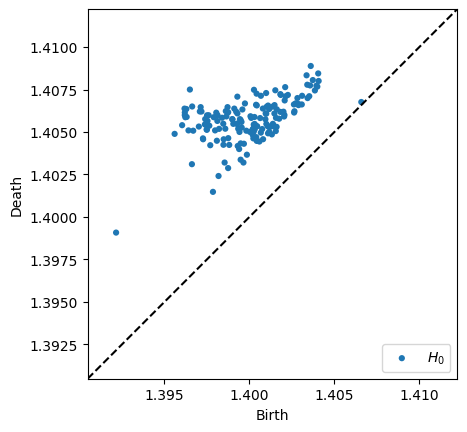

In [ ]:
plot_diagrams(nw_dg)

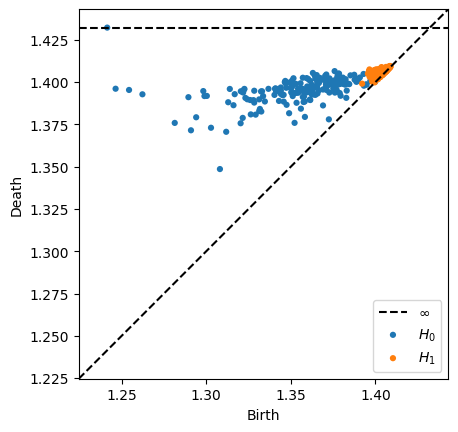

In [ ]:
plot_diagrams(dgms[15])

In [ ]:
calc_pers_entropy([0.00778294, 0.00778294, 0.00778294, 0.00778294, 0.00778294])

2.3219280948873626

In [ ]:
np.log2(650)

9.344295907915816

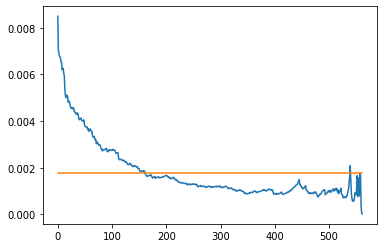

In [ ]:
plt.plot(dfs)
plt.plot(compare)
#plt.plot(compare)

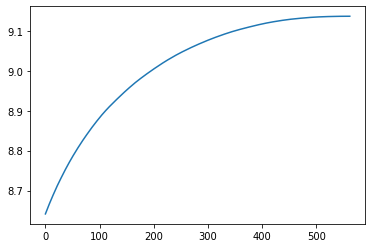

In [ ]:
plt.plot(HLs)

In [ ]:
try_dgm = [filter_dgm(dgms[15][0]), filter_dgm(dgms[15][1])]

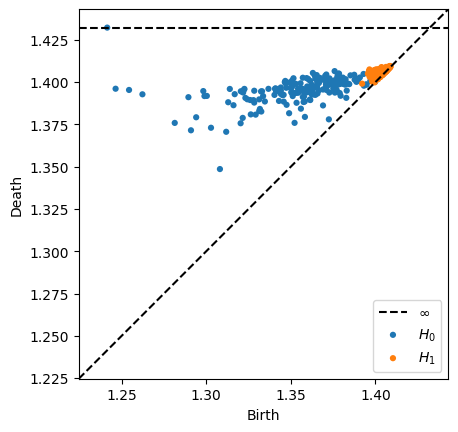

In [ ]:
plot_diagrams(dgms[15])

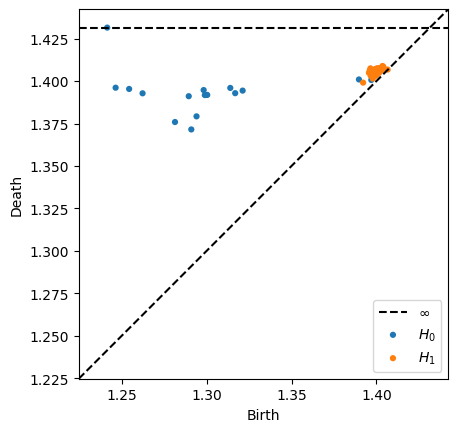

In [ ]:
plot_diagrams(try_dgm)

In [ ]:
filtered_diags = []
LEN = len(dgms)
t_mean = 1.119410228729248
ETA = LEN*t_mean/60
print(f'ETA estimado para todos los diagramas: {round(ETA,2)} minutos')
for i in range(LEN):
  filtered_diags.append([filter_dgm(dgms[i][0]), filter_dgm(dgms[i][1])])

In [ ]:
# prueba menor
filtered_diags = []
LEN = len(dgms)
t_mean = 1.119410228729248
ETA = LEN*t_mean/60
print(f'ETA estimado para todos los diagramas: {round(ETA,3)} minutos')
for i in range(5):
  filtered_diags.append([filter_dgm(dgms[i][0]), filter_dgm(dgms[i][1])])

ETA estimado para todos los diagramas: 14.702 minutos


In [ ]:
type(dgms), type(dgms[0]), type(dgms[0][0]), type(dgms[0][0][0])

(list, list, numpy.ndarray, numpy.ndarray)

In [ ]:
dgms[0][0][0]

array([1.41361785,        inf])

In [ ]:
filtered_diags[0][0][0]

array([1.41361785,        inf])

In [ ]:
type(filtered_diags), type(filtered_diags[0]), type(filtered_diags[0][0]), type(filtered_diags[0][0][0])

(list, list, numpy.ndarray, numpy.ndarray)

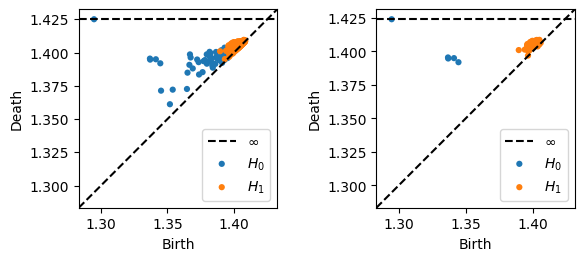

In [ ]:
k = 3
plt.figsize=(30,20)
plt.subplots_adjust(wspace=.5)
plt.subplot(1,2,2)
plot_diagrams(filtered_diags[k])
plt.subplot(1,2,1)
plot_diagrams(dgms[k])

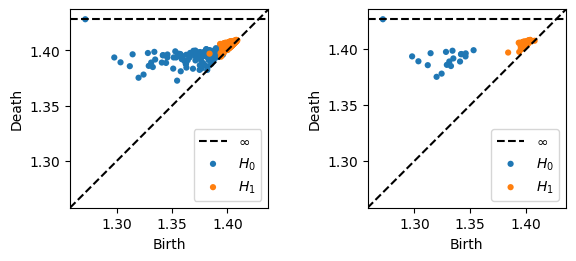

In [ ]:
k = 2
plt.figsize=(20,20)
plt.subplots_adjust(wspace=.5)
plt.subplot(1,2,2)
plot_diagrams(filtered_diags[k])
plt.subplot(1,2,1)
plot_diagrams(dgms[k])

### Vectorización try

In [ ]:
#HAY QUE TENER OJO CON LOS ARRAYS O LISTAS, MODIFICAR LA FUNCIÓN DE FILTER PARA QUE DEVUELVA BIEN LOS TYPE()
# TAMBIÉN HAY QUE CAMBIAR LA FUNCIÓN PARA QUE CUANDO TIENE UN SOLO PUNTO REEMPLACE EL INF POR UN NÚMERO MÁXIMO SINO QUEDAN ARRAYS VACÍOS EN EL SELECTOR.

In [ ]:
def gen_diags_dict(Dg):
  Len = len(Dg)
  diags_dict = {'Rips_dim_0': [],'Rips_dim_1': []}

  for i in range(Len):
    diags_dict['Rips_dim_0'].append(np.array(Dg[i][0]))
    diags_dict['Rips_dim_1'].append(np.array(Dg[i][1]))
  return diags_dict

In [ ]:
dgms[2][0].shape

(137, 2)

In [ ]:
filtered_diags[2][0].shape

(1, 19, 2)

Varianza explicada [0.8312797  0.15520482]
Varianza explicada total 0.9864845


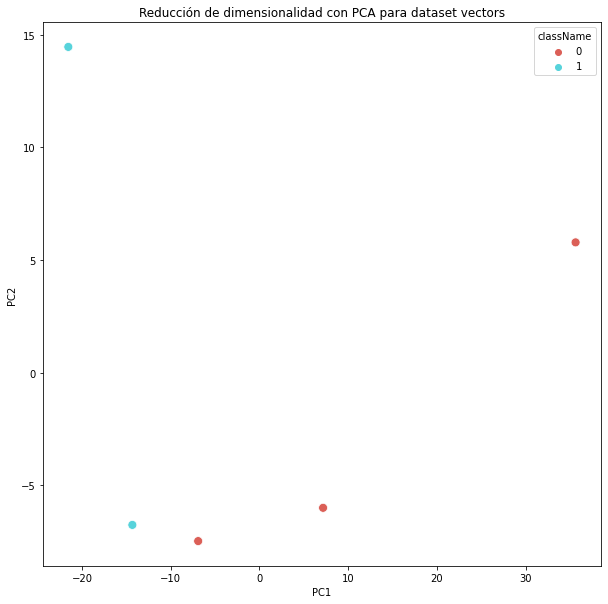

In [ ]:
Len = len(filtered_diags)
diags_dict = {'Rips_dim_0': [],'Rips_dim_1': []}

for i in range(Len):
  diags_dict['Rips_dim_0'].append(filtered_diags[i][0])
  diags_dict['Rips_dim_1'].append(filtered_diags[i][1])

#diags_dict = {'Rips_dim_1': diags_dict['Rips_dim_1']}
F = np.array([[]]*Len)

labs_df = labels_train
L = pd.Series(labs_df)
L = np.asarray(pd.get_dummies(L))

labs_df = pd.DataFrame({'label': labels_train})

D = diag_prepro(diags_dict, use_selector = False, use_prominent = False, thresh = 100, use_scaler = True, use_padding = True)

lend = len(D)
perslay_parameters = load_architecture_params(weight="None", len_d = lend, layer= "Landscape", perm_op = "sum")
vectors = vector_representations(D, perslay_parameters)

vec_df = pd.DataFrame(vectors)

reduceDim(df=vec_df,target=labs_df['label'], method_class=PCA, df_name='vectors')

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

El score medio es 0.5075955491049831


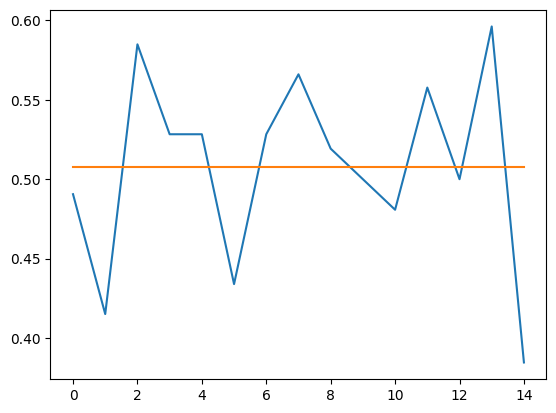

In [ ]:
folds = 15
est = RandomForestClassifier(n_estimators=150)
cv_results = cross_validate(est, X=vec_df, y=labels_train, cv=folds)
plt.plot(cv_results['test_score'])
mn = cv_results['test_score'].mean()
plt.plot([mn]*folds)
print(f'El score medio es {mn}')

El score medio es 0.5263667150459603


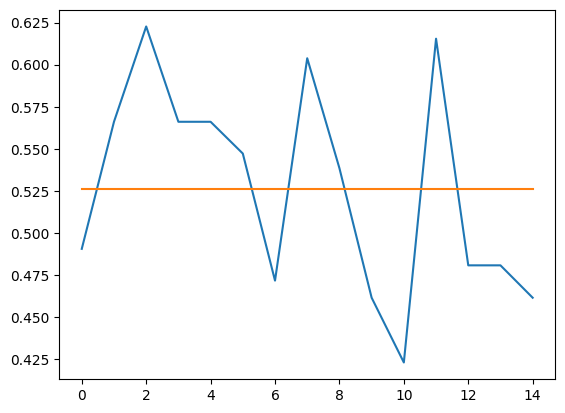

In [ ]:
folds = 15
#est = RandomForestClassifier(n_estimators=150)
est = GradientBoostingClassifier()
cv_results = cross_validate(est, X=vec_df, y=labels_train, cv=folds)
plt.plot(cv_results['test_score'])
mn = cv_results['test_score'].mean()
plt.plot([mn]*folds)
print(f'El score medio es {mn}')

El score medio es 0.5305515239477503


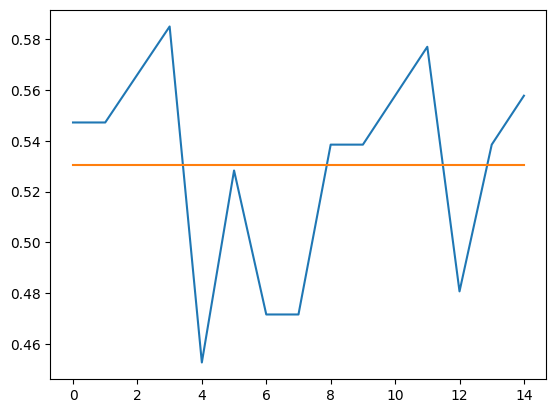

In [ ]:
folds = 15
est = LogisticRegression(solver='liblinear')
cv_results = cross_validate(est, X=vec_df, y=labels_train, cv=folds)
plt.plot(cv_results['test_score'])
mn = cv_results['test_score'].mean()
plt.plot([mn]*folds)
print(f'El score medio es {mn}')

# Entropy filter

In [ ]:
def sort_entropy_diagram(diagram, maxlen=2):
  '''
  Esta función toma un diagrama de persistencia, para un nivel de homología solo (cualquiera)
  devuelve el diagrama ordenado de forma ascendiente según sus lifetimes, en forma de ndarray
  de shape (n_points, 3), donde cada punto es un triple [b,d,d-b]
  Devuelve el largo total de los intervalos (un número) (S)
  y la entropía de los diagramas
  '''
  ents = []
  for i in range(len(diagram)):
    if diagram[i][1] != np.inf:
      entry = diagram[i][1]-diagram[i][0]
      ents.append(entry)
    else:
      entry = maxlen - diagram[i][0]
      ents.append(entry)
  largo_total = np.sum(ents)
  entrop = calc_pers_entropy(ents, S = largo_total)
  ents = np.reshape(ents, (len(ents),1))
  new_diag = np.hstack((diagram,ents))
  new_diag.view('i8,i8,i8').sort(order=['f2'], axis=0)
  new_diag = new_diag[::-1]
  return new_diag, largo_total, entrop

def calc_pers_entropy(lengths, S = 0):
  if S == 0:
    S = np.sum(lengths)
  E = 0
  for L in lengths:
    E += (-L/S)*np.log2(L/S)
  return E

def l_prime(lista, k):
  assert k<len(lista)
  if k == 0: return []
  else:
    s = np.sum(lista[k:])
    hi = calc_pers_entropy(lista[k:], S = 1)
    li = 2**(-hi/s)
    return [li]*k

def filter_dgm(diagram):
  '''
  Toma un diagrama (de una sola dimensión de homología) y lo devuelve filtrado por entropía.
  Mantiene los puntos cuyo aporte de entropía sea mayor al uniforme.
  '''
  new_diag, largo_total, ent= sort_entropy_diagram(diagram)
  HLs = [] # arranco la lista de entropías con la entropía total
  lista = new_diag[:,2] # me quedo solo con la columna que me da los lifetimes (la tercera)
  N = len(lista)
  if N!= 1:
    for k in range(N):
      HL_prime = np.concatenate((l_prime(lista,k),lista[k:]))
      HLs.append(calc_pers_entropy(HL_prime))

    dfs = [(HLs[i]-HLs[i-1])/(HLs[-1]-HLs[0]) for i in range(1,len(HLs))]
    compare = [1/len(dfs)]*len(dfs)
    tru = [dfs[i]>= compare[i] for i in range(len(dfs))]
    nw_dg = [np.array([new_diag[i][0], new_diag[i][1]]) for i in range(len(tru)) if tru[i]]
    nw_dg = np.array(nw_dg)
  elif N == 1:
    nw_dg = [new_diag[0][0], new_diag[0][1]]
    nw_dg = np.array([nw_dg])
  return nw_dg

def filter_diagrams(dgms):
  filtered_diags = []
  LEN = len(dgms)
  t_mean = 1.119410228729248
  ETA = LEN*t_mean/60
  print(f'ETA estimado para todos los diagramas: {round(ETA,3)} minutos')
  for i in range(5):
    filtered_diags.append([filter_dgm(dgms[i][0]), filter_dgm(dgms[i][1])])
  return filtered_diags

#USO:
# filtered_diags = filter_diagrams(dgms)

# Entropy scatter 2d

In [126]:
# Entregame los diagramas en el formato que  venimos manejando, o sea:
# una lista de shape (total_num_diags, homologies, pd_points)
# hay que convertirlo a una lista de tipo (total_num_diags, (hom_b, hom_d, hom_level))

def diag_to_entropy2d(dgms, maxlen = 2):
  '''
  Toma una lista de diagramas estándar y devuelve una lista de sus entropías
  cada elemento tiene (entropy_hom_0, entropy_hom_1).
  '''
  entropy = gtd.PersistenceEntropy()
  complete_entropies = []
  for i in range(len(dgms)):
    complete_diagram =  np.vstack((np.hstack((dgms[i][0], [[0]]*len(dgms[i][0]))),np.hstack((dgms[i][1], [[1]]*len(dgms[i][1])))))
    complete_diagram[complete_diagram == np.inf] = maxlen
    complete_entropy = entropy.fit_transform([complete_diagram])
    complete_entropies.append(complete_entropy[0].tolist())
  ents_x = [i[0] for i in complete_entropies]
  ents_y = [i[1] for i in complete_entropies]
  return ents_x, ents_y

In [ ]:
ents_x, ents_y = diag_to_entropy2d(dgms)

In [ ]:
scatter = plt.scatter(ents_x, ents_y, c= train_labels)
plt.title(f'Scatter de entropías para Hom0 y Hom1 de {tipo_mat} y {tipo_dist}, para {parc_id}')
plt.legend(train_labels, ('clase0','clase1'))
#plt.legend(handles=train_labels, labels=['clase0', 'clase1'])


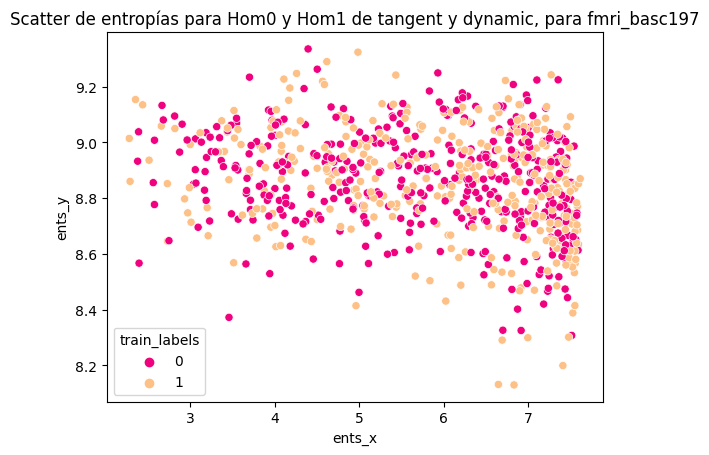

In [ ]:
ents_df = pd.DataFrame({'ents_x':ents_x, 'ents_y':ents_y, 'train_labels':train_labels})
sns.scatterplot(data=ents_df, x='ents_x', y='ents_y',
                    palette=sns.color_palette("Accent_r", 2),
                    hue= "train_labels",
                    s=35)
plt.title(f'Scatter de entropías para Hom0 y Hom1 de {tipo_mat} y {tipo_dist}, para {parc_id}')
plt.show()

### Scatters para todos los diagramas

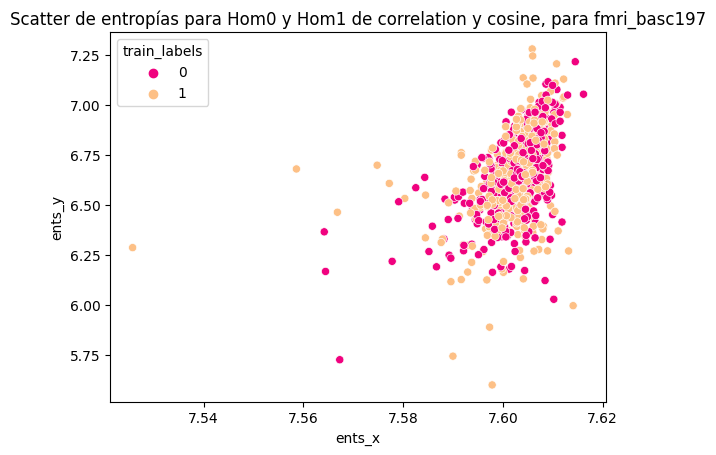

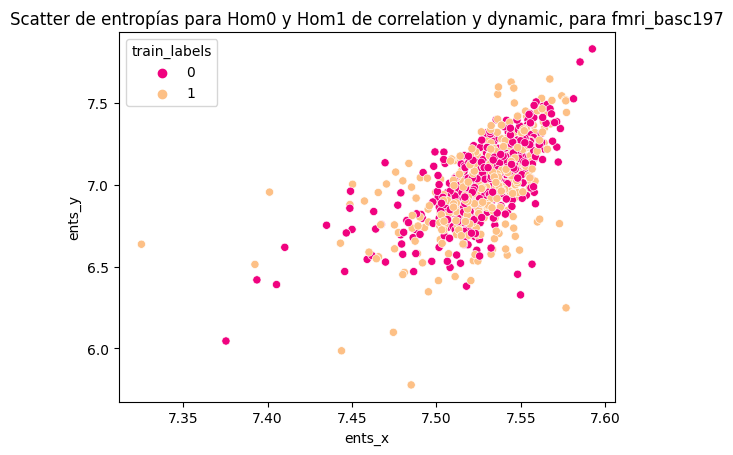

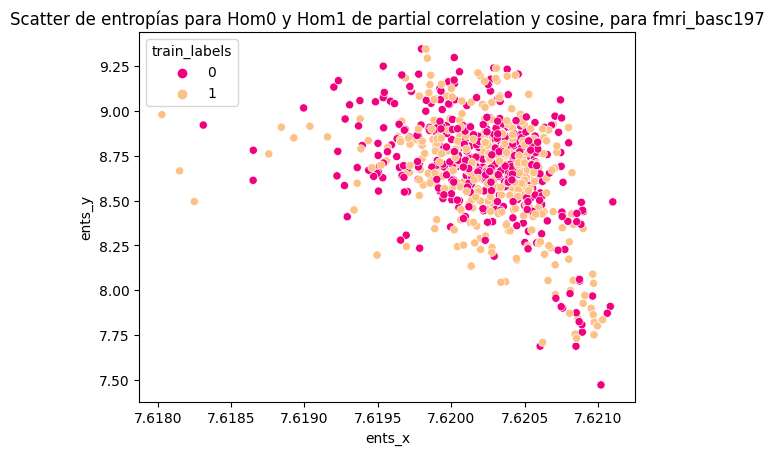

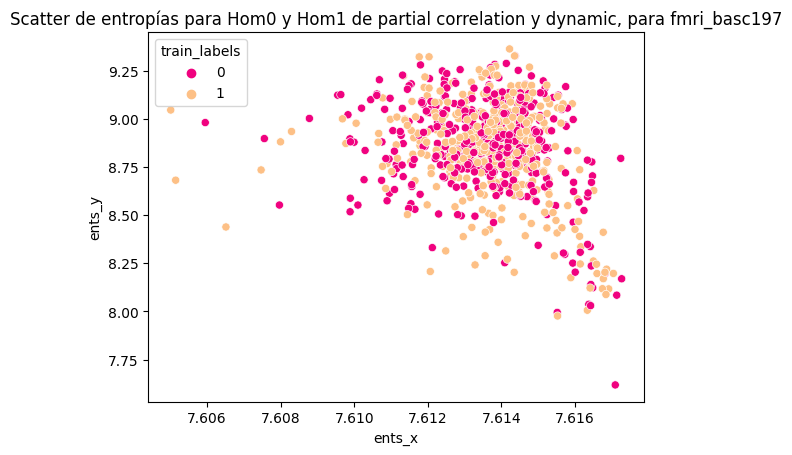

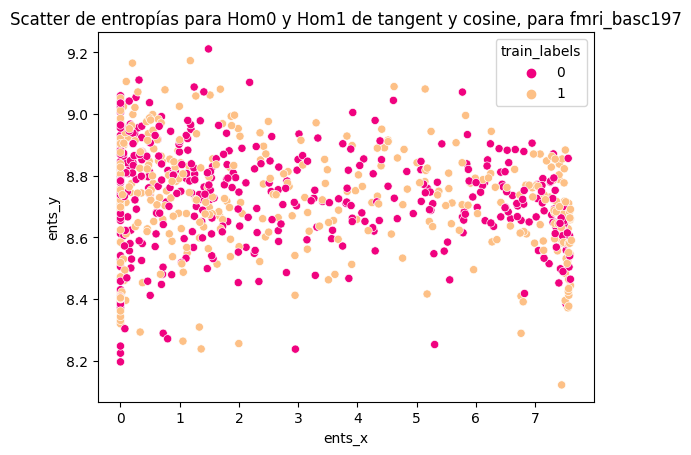

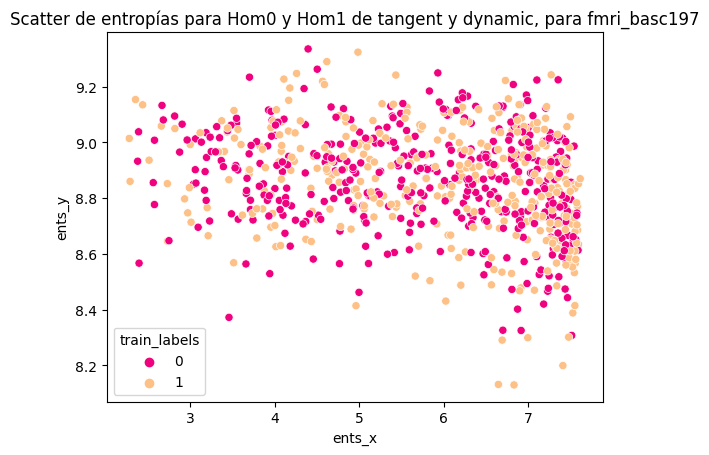

In [ ]:
matrixes = ['correlation', 'partial correlation', 'tangent']
distances = ['cosine', 'dynamic']
parc_id = 'fmri_basc197'

for tipo_mat in matrixes:
  for tipo_dist in distances:
    path = 'train/prueba_semana26/train_dgms_' + tipo_mat + '_' + tipo_dist +'_' + parc_id + '.pkl'
    with open(path, 'rb') as handle:
        dgms = pkl.load(handle)
    ents_x, ents_y = diag_to_entropy2d(dgms)
    ents_df = pd.DataFrame({'ents_x':ents_x, 'ents_y':ents_y, 'train_labels':train_labels})
    sns.scatterplot(data=ents_df, x='ents_x', y='ents_y',
                        palette=sns.color_palette("Accent_r", 2),
                        hue= "train_labels",
                        s=35)
    plt.title(f'Scatter de entropías para Hom0 y Hom1 de {tipo_mat} y {tipo_dist}, para {parc_id}')
    plt.show()


# Betti curves

In [55]:
def diag_to_betti(dgms, maxlen = 2):
  '''
  Toma una lista de diagramas estándar y devuelve dos listas de betti curves, una por hom_dim
  '''
  curves = gtd.BettiCurve()
  betti_curves_h0 = []
  betti_curves_h1 = []
  for i in range(len(dgms)):
    complete_diagram =  np.vstack((np.hstack((dgms[i][0], [[0]]*len(dgms[i][0]))),np.hstack((dgms[i][1], [[1]]*len(dgms[i][1])))))
    complete_diagram[complete_diagram == np.inf] = maxlen
    betti_curv = curves.fit_transform([complete_diagram])
    betti_curves_h0.append(betti_curv[0][0].tolist())
    betti_curves_h1.append(betti_curv[0][1].tolist())
  return betti_curves_h0, betti_curves_h1

In [ ]:
betti_curves_h0, betti_curves_h1 = diag_to_betti(dgms)

In [ ]:
betti_df = pd.DataFrame(betti_curves_h0)
betti_df['labels']= train_labels

betti_stats_df = betti_df.groupby(betti_df.labels).mean().T
betti_stats_df.columns = ['mean0', 'mean1']
betti_stats_df[['std0', 'std1']] = betti_df.groupby(betti_df.labels).std().T

under_line0 = betti_stats_df['mean0']-betti_stats_df['std0']
over_line0 = betti_stats_df['mean0']+betti_stats_df['std0']
under_line1 = betti_stats_df['mean1']-betti_stats_df['std1']
over_line1 = betti_stats_df['mean1']+betti_stats_df['std1']

index = np.array(betti_stats_df['mean0'].index, dtype=float)

ds0 = pd.Series(betti_stats_df['mean0'])
ds1 = pd.Series(betti_stats_df['mean1'])

# DF hom1
betti_df1 = pd.DataFrame(betti_curves_h1)
betti_df1['labels']= train_labels

betti_stats_df1 = betti_df1.groupby(betti_df1.labels).mean().T
betti_stats_df1.columns = ['mean0', 'mean1']
betti_stats_df1[['std0', 'std1']] = betti_df1.groupby(betti_df1.labels).std().T

under_line01 = betti_stats_df1['mean0']-betti_stats_df1['std0']
over_line01 = betti_stats_df1['mean0']+betti_stats_df1['std0']
under_line11 = betti_stats_df1['mean1']-betti_stats_df1['std1']
over_line11 = betti_stats_df1['mean1']+betti_stats_df1['std1']

index1 = np.array(betti_stats_df1['mean0'].index, dtype=float)

ds01 = pd.Series(betti_stats_df1['mean0'])
ds11 = pd.Series(betti_stats_df1['mean1'])

In [ ]:
def plotting(title):
  fig, ax = plt.subplots(1, 2, figsize=(16,8))

  ax[0].plot(ds0, label='Clase0', color = 'red')
  ax[0].plot(ds1, label='Clase1', color = 'b')
  ax[0].fill_between(index, under_line0, over_line0, color='r', alpha=.1)
  ax[0].fill_between(index, under_line1, over_line1, color='b', alpha=.1)
  ax[0].title.set_text('Curvas de Betti Hom_0')
  ax[0].legend()

  ax[1].plot(ds01, label='Clase0', color = 'red')
  ax[1].plot(ds11, label='Clase1', color = 'b')
  ax[1].fill_between(index, under_line01, over_line01, color='r', alpha=.1)
  ax[1].fill_between(index, under_line11, over_line11, color='b', alpha=.1)
  ax[1].title.set_text('Curvas de betti Hom_1')
  ax[1].legend()

  fig.suptitle(title)
  plt.show()

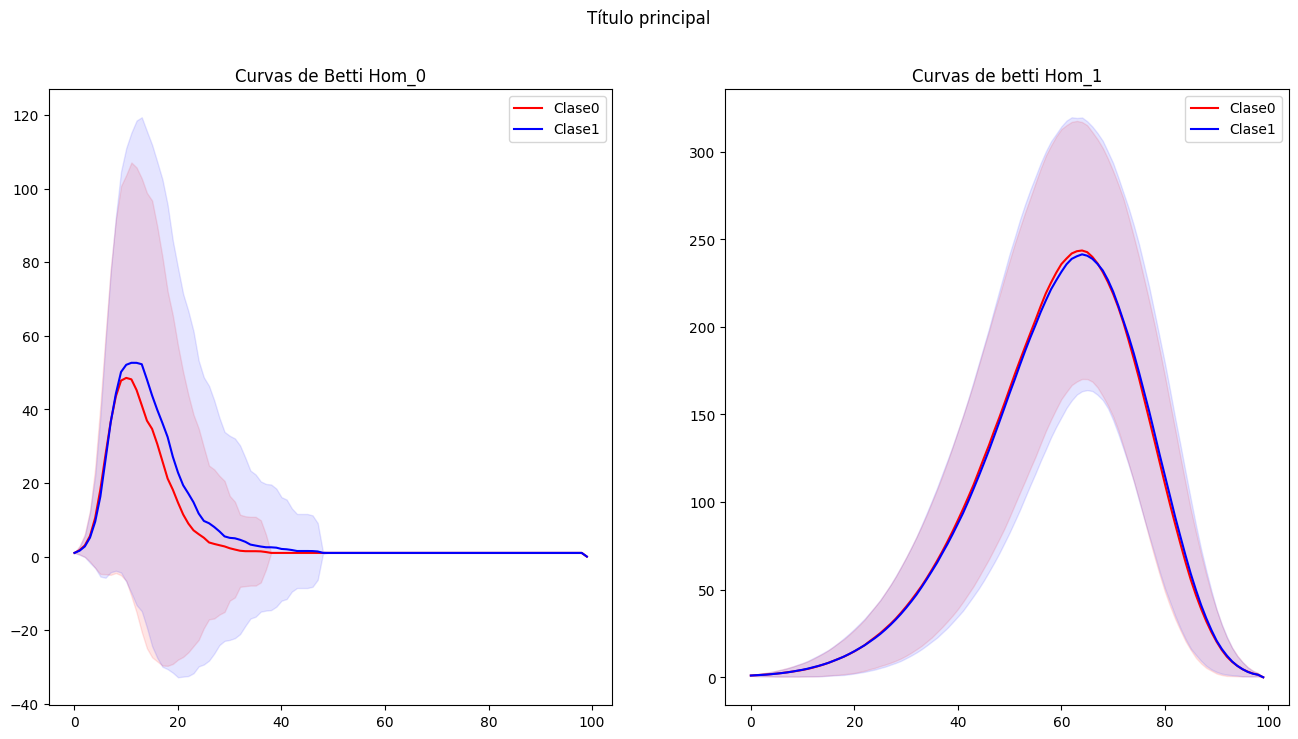

In [ ]:
plotting('Título principal')

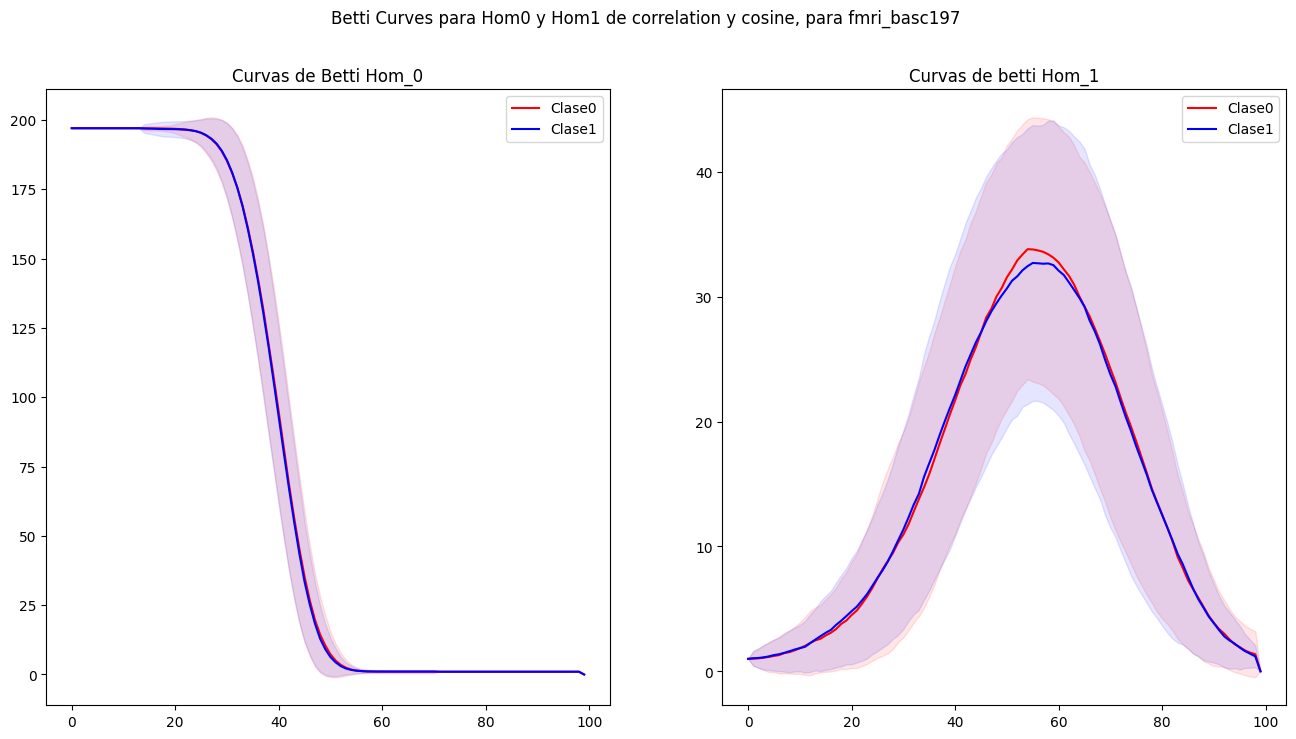

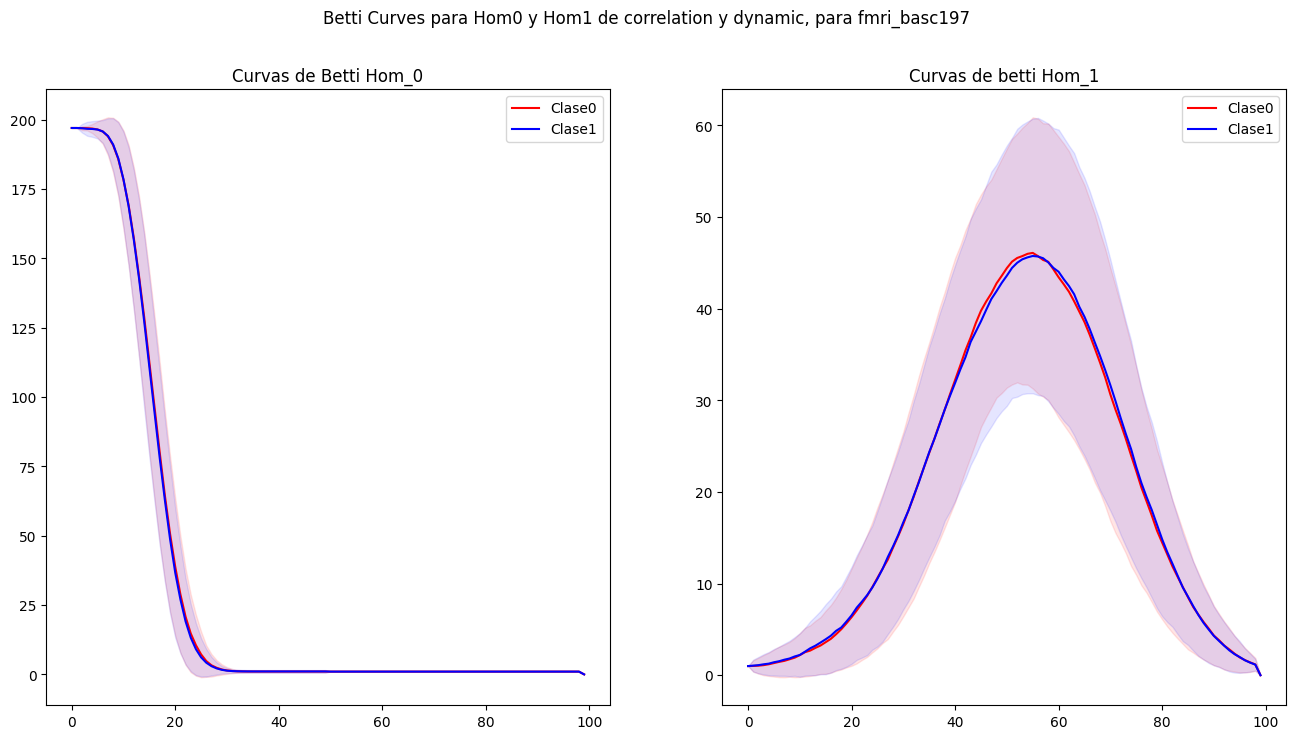

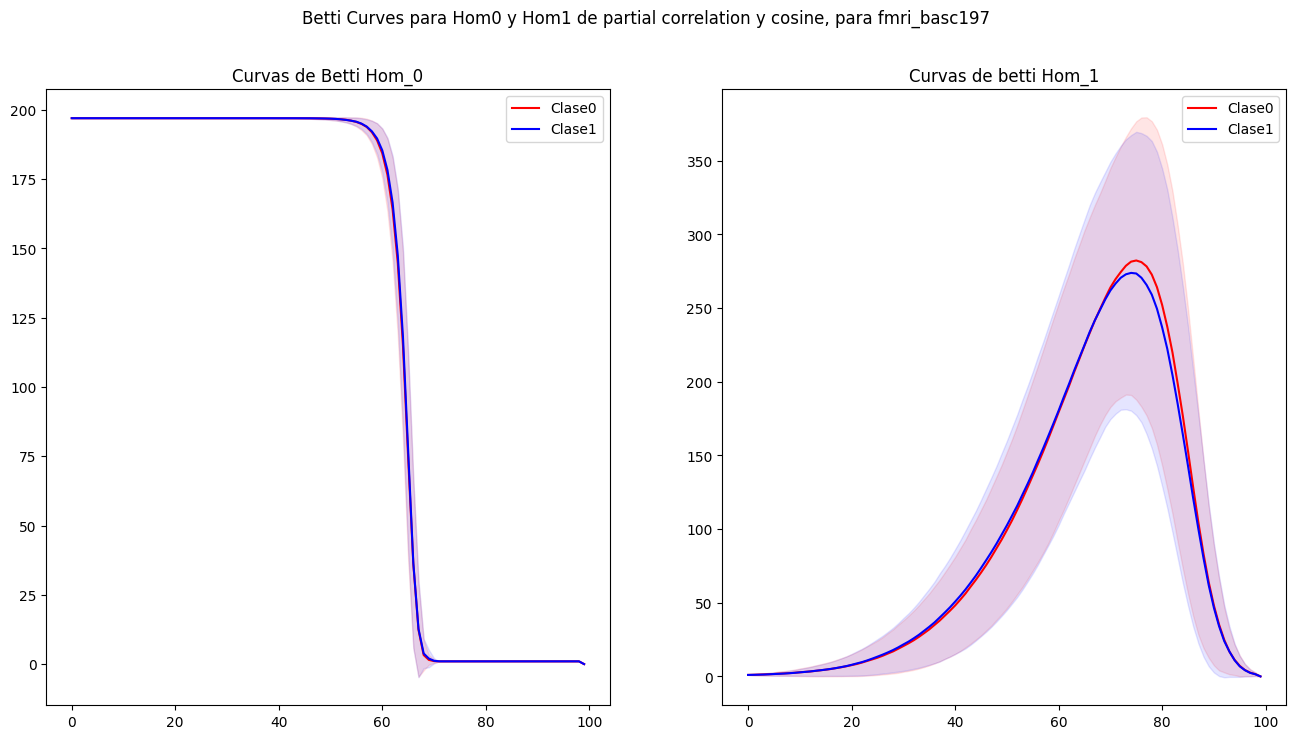

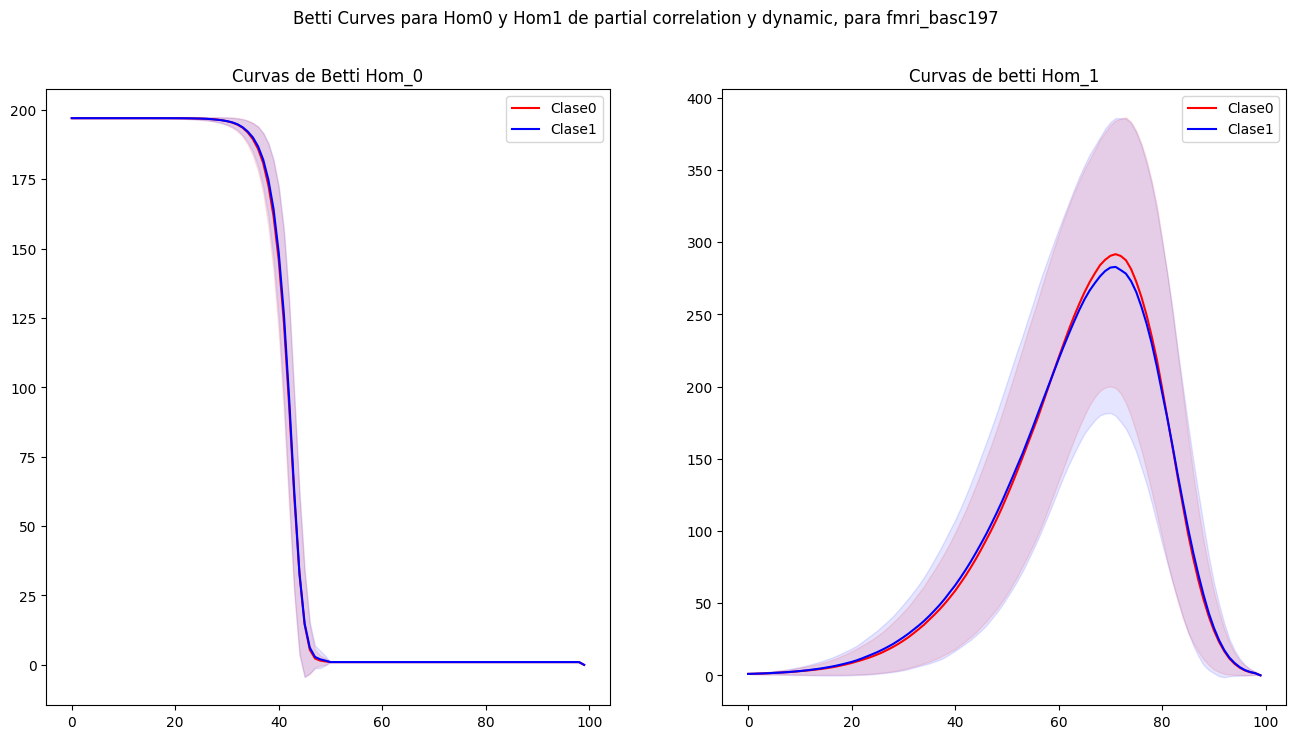

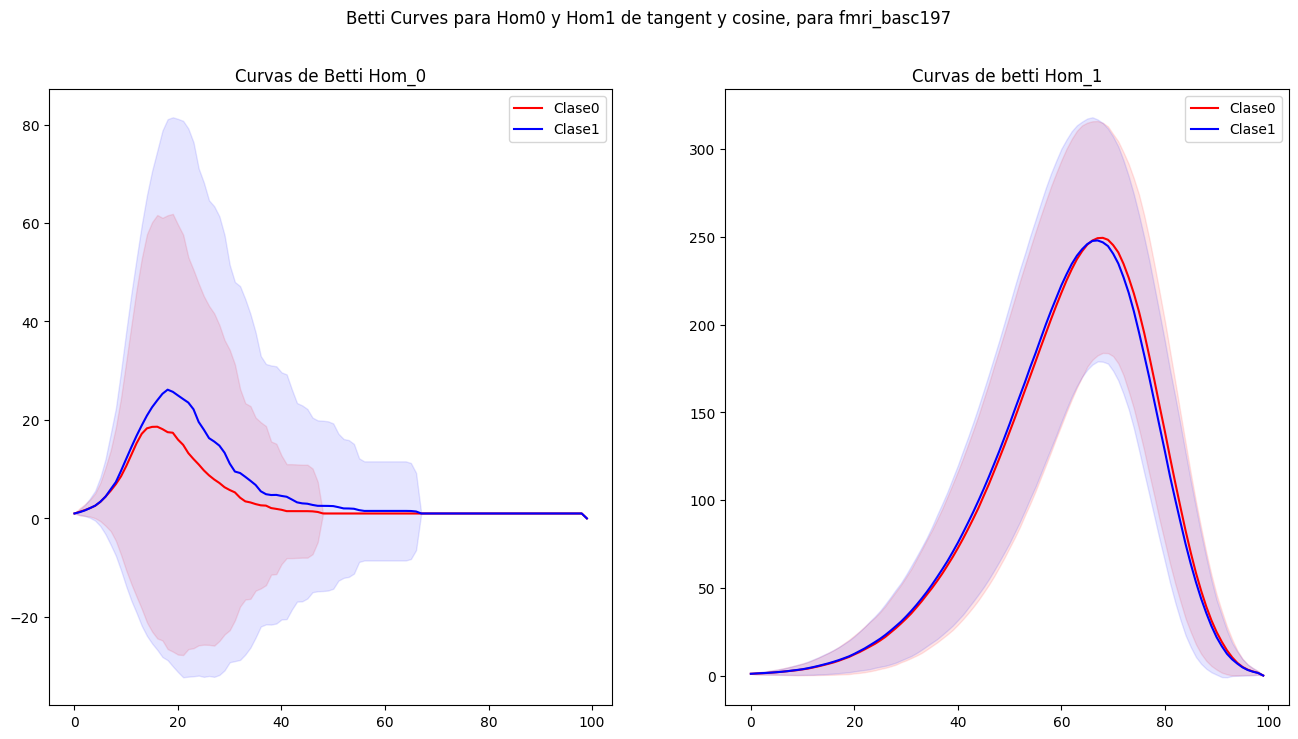

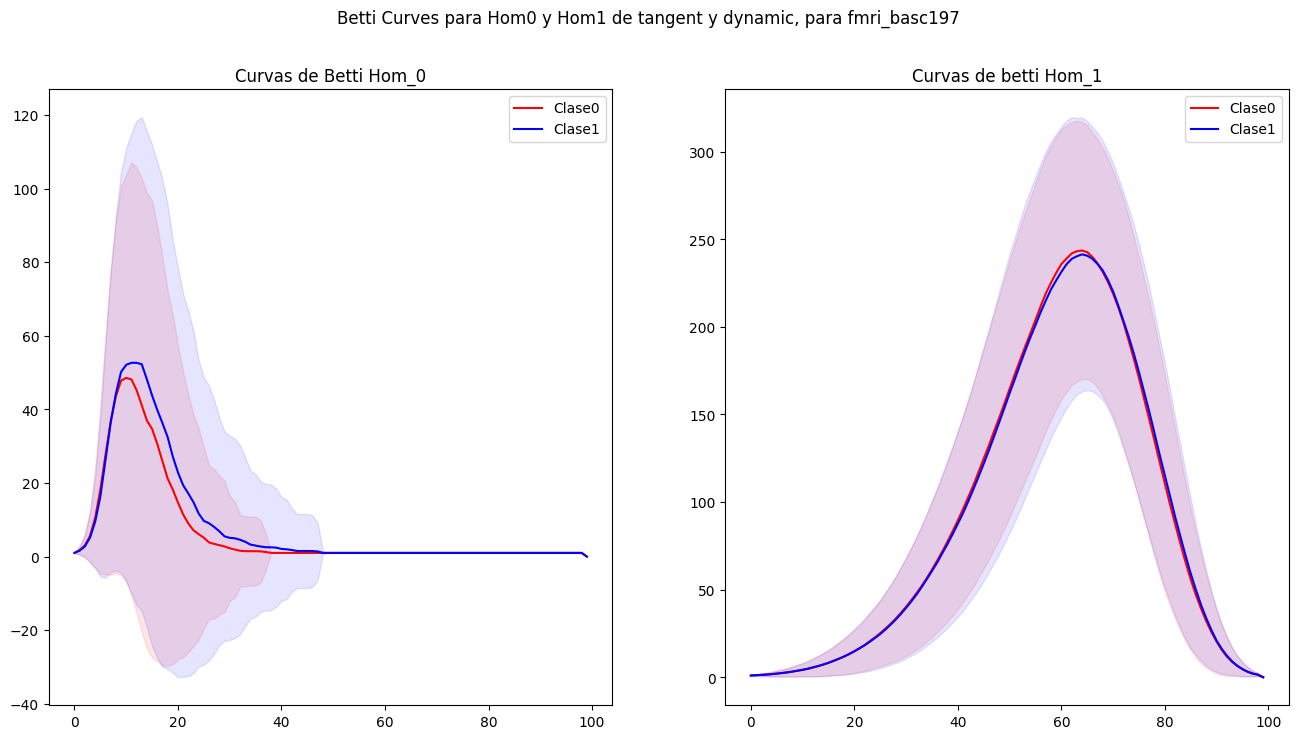

In [ ]:
matrixes = ['correlation', 'partial correlation', 'tangent']
distances = ['cosine', 'dynamic']
parc_id = 'fmri_basc197'

for tipo_mat in matrixes:
  for tipo_dist in distances:
    path = 'train/prueba_semana26/train_dgms_' + tipo_mat + '_' + tipo_dist +'_' + parc_id + '.pkl'
    with open(path, 'rb') as handle:
        dgms = pkl.load(handle)

    betti_curves_h0, betti_curves_h1 = diag_to_betti(dgms)
    
    betti_df = pd.DataFrame(betti_curves_h0)
    betti_df['labels']= train_labels

    betti_stats_df = betti_df.groupby(betti_df.labels).mean().T
    betti_stats_df.columns = ['mean0', 'mean1']
    betti_stats_df[['std0', 'std1']] = betti_df.groupby(betti_df.labels).std().T

    under_line0 = betti_stats_df['mean0']-betti_stats_df['std0']
    over_line0 = betti_stats_df['mean0']+betti_stats_df['std0']
    under_line1 = betti_stats_df['mean1']-betti_stats_df['std1']
    over_line1 = betti_stats_df['mean1']+betti_stats_df['std1']

    index = np.array(betti_stats_df['mean0'].index, dtype=float)

    ds0 = pd.Series(betti_stats_df['mean0'])
    ds1 = pd.Series(betti_stats_df['mean1'])

    # DF hom1
    betti_df1 = pd.DataFrame(betti_curves_h1)
    betti_df1['labels']= train_labels

    betti_stats_df1 = betti_df1.groupby(betti_df1.labels).mean().T
    betti_stats_df1.columns = ['mean0', 'mean1']
    betti_stats_df1[['std0', 'std1']] = betti_df1.groupby(betti_df1.labels).std().T

    under_line01 = betti_stats_df1['mean0']-betti_stats_df1['std0']
    over_line01 = betti_stats_df1['mean0']+betti_stats_df1['std0']
    under_line11 = betti_stats_df1['mean1']-betti_stats_df1['std1']
    over_line11 = betti_stats_df1['mean1']+betti_stats_df1['std1']

    index1 = np.array(betti_stats_df1['mean0'].index, dtype=float)

    ds01 = pd.Series(betti_stats_df1['mean0'])
    ds11 = pd.Series(betti_stats_df1['mean1'])

    tit = f'Betti Curves para Hom0 y Hom1 de {tipo_mat} y {tipo_dist}, para {parc_id}'
    plotting(tit)

# Distancia Euclidea y mah

In [6]:
data_train, labels_train = get_train_data()
data_train_functional = data_train[[col for col in data_train.columns if col.startswith('fmri')]]
data_train_functional['tmp'] = data_train_functional.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
def get_all_patients(ids_list, parcelation):
  pacientes = []
  for ID in ids_list:
    path = data_train_functional.loc[data_train_functional['tmp'] == ID, parcelation].item()
    paciente=pd.read_csv(path)
    paciente = np.asarray(paciente)
    pacientes.append(paciente)
  return pacientes


def gen_matrices(lista_pacientes, tipo_matriz, as_distance, keep_pvalue = 1):
  """ lista_pacientes debe ser una lista de arrays de numpy de (n_obs,n_features) cada una
  Y tipo_matriz puede ser cualquiera de 'correlation', 'partial correlation', 'tangent', y 'precision'
  El parámetro as_distance controla si se transforma la matriz a distancia coseno ('cosine'), distancia dinámica ('dynamic'), o ninguna (False)
  Si as_distance no es Falso y la matriz es tangente, entonces usa el argumento máximo para MinMaxScale
  El parámetro keep_pvalue descarta (solo para la matriz de correlación) aquellas correlaciones con significatividad menor a keep_pvalue
  (ej, keep_pvalue = 0.1 deja solamente las correlaciones con p-valor menor o igual a 0.1)
  TEST: agregar as_distance euclidean y mahalanobis
  """

  if (tipo_matriz == 'euclidean') or (tipo_matriz == 'mahalanobis'):
    matrices = []
    for pac in lista_pacientes:
      matrix = pdist(pac, metric= tipo_matriz)
      matrix = squareform(matrix)
      matrices.append(matrix)
    matrices = np.array(matrices)

  else:
    connect = ConnectivityMeasure(kind = tipo_matriz)
    matrices = connect.fit_transform(lista_pacientes)

    if (keep_pvalue < 1) and (tipo_matriz == 'correlation'):
      for i in range(matrices.shape[0]):
        matrix = non_trivial_correlation(lista_pacientes[i], matrices[i], threshold = keep_pvalue)
        matrices[i] = matrix
    if (as_distance == 'cosine') and (tipo_matriz != 'tangent'):
      for i in range(matrices.shape[0]):
        matrices[i] = np.sqrt(2*(1-matrices[i]))
    if (as_distance == 'dynamic') and (tipo_matriz != 'tangent'):
      for i in range(matrices.shape[0]):
        matrices[i] = 1-np.abs(matrices[i])

    if (as_distance == 'cosine') and (tipo_matriz == 'tangent'):
      max_value = np.amax(np.abs(matrices)) + 0.1
      for i in range(matrices.shape[0]):
        matrices[i] = np.sqrt(2*(1-matrices[i]/max_value))
    if (as_distance == 'dynamic') and (tipo_matriz == 'tangent'):
      max_value = np.amax(np.abs(matrices)) + 0.1
      for i in range(matrices.shape[0]):
        matrices[i] = 1-np.abs(matrices[i]/max_value)

  return matrices

def non_trivial_correlation(X, corrmat, threshold=0.1): # Ver https://stackoverflow.com/questions/59416390/how-can-i-compute-the-pearson-correlation-matrix-and-retain-only-significant-val
    n = X.shape[0] # Es para hacer el threshold del p-valor
    p = 2 * beta(n/2 - 1, n/2 - 1, loc=-1, scale=2).cdf(-abs(corrmat))
    corrmat[p > threshold] = 0
    return corrmat

def triag_array(array):
    return(array[np.triu_indices_from(array)])

def ripser_diagram(paciente, hom_over_p=2, hom_dimension = 1, distm = True):
    diag = ripser(paciente, distance_matrix=distm, coeff = hom_over_p, maxdim=hom_dimension)['dgms']
    return(diag)


In [8]:
train_ids = data_train_functional['tmp'].values

In [9]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [10]:
train_ids = ids_labs['id'].tolist()

In [11]:
pacientes = get_all_patients(train_ids, 'fmri_basc197')

In [103]:
mats = gen_matrices(pacientes, tipo_matriz = 'correlation', as_distance = 'cosine',keep_pvalue= 1)

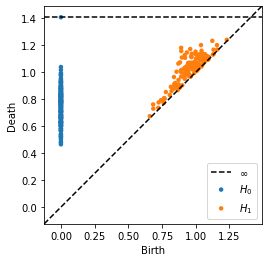

In [13]:
dg = ripser_diagram(mats[400])
plot_diagrams(dg)

In [104]:
tipo_mat = 'euclidean'
tipo_dist = 'False'

#path = 'train/prueba_semana26/train_matrix_' + tipo_mat + '_' + tipo_dist +'_' + parc_id + '.pkl'
#with open(path, 'wb') as handle:
#  pkl.dump(mats, handle, protocol=pkl.HIGHEST_PROTOCOL)

dgms = []
Len = len(mats)
for i in range(Len):
  dgm = ripser_diagram(mats[i])
  dgms.append(dgm)


#path = 'train/prueba_semana26/train_dgms_' + tipo_mat + '_' + tipo_dist +'_' + parc_id + '.pkl'
#with open(path, 'wb') as handle:
 # pkl.dump(dgms, handle, protocol=pkl.HIGHEST_PROTOCOL)

In [105]:
Len = len(dgms)
diags_dict = {'Rips_dim_0': [],'Rips_dim_1': []}

for i in range(Len):
  diags_dict['Rips_dim_0'].append(dgms[i][0])
  diags_dict['Rips_dim_1'].append(dgms[i][1])


F = np.array([[]]*Len)

In [31]:
def diag_prepro(diags_dict, use_selector = True, use_prominent = True, thresh = 500, use_scaler = True, use_padding = True):
  
  # https://gudhi.inria.fr/python/3.1.0.rc1/representations.html
  # Whole pipeline
  tmp = Pipeline([
          ("Selector",      tda.DiagramSelector(use=use_selector, point_type="finite")),
          ("ProminentPts",  tda.ProminentPoints(use=use_prominent, num_pts=thresh)),
          ("Scaler",        tda.DiagramScaler(use=use_scaler, scalers=[([0,1], MinMaxScaler())])),
          ("Padding",       tda.Padding(use=use_padding)),
                  ])

  prm = {filt: {"ProminentPts__num_pts": min(thresh, max([len(dgm) for dgm in diags_dict[filt]]))} 
        for filt in diags_dict.keys() if max([len(dgm) for dgm in diags_dict[filt]]) > 0}

  # Apply the previous pipeline on the different filtrations.
  diags = []
  for dt in prm.keys():
      param = prm[dt]
      tmp.set_params(**param)
      diags.append(tmp.fit_transform(diags_dict[dt]))

  # For each filtration, concatenate all diagrams in a single array.
  D, npts = [], len(diags[0])
  for dt in range(len(prm.keys())):
      D.append(np.array(np.concatenate([diags[dt][i][np.newaxis,:] for i in range(npts)],axis=0),dtype=np.float32))
  
  return D

def load_architecture_params(weight, len_d, layer = "Image", perm_op = "mean"):
  perslay_parameters = []
  perslay_channel = {}

  perslay_channel["pweight_train"] = True
  perslay_channel["layer_train"]   = True
  perslay_channel["final_model"]   = tf.keras.Sequential([tf.keras.layers.Flatten()])

  if layer == "Landscape":
    perslay_channel["layer"]           = "Landscape"
    perslay_channel["lsample_num"]     = 100
    perslay_channel["lsample_init"]    = rui(0.0, 1.0)

  if layer == "Image":
    perslay_channel["layer"]           = "Image"
    perslay_channel["image_size"]      = (20, 20)
    perslay_channel["image_bnds"]      = ((-.001, 2.001), (-.001, 2.001))
    perslay_channel["lvariance_init"]  = 3.


  if weight == "gmix":
    perslay_channel["pweight"]       = "gmix"
    perslay_channel["pweight_num"]   = 3
    perslay_channel["pweight_init"]  = np.array(np.vstack([np.random.uniform(0.,1.,[2,3]),
                                                           5.*np.ones([2,3])]), dtype=np.float32)
  if weight == "power":
    perslay_channel["pweight"]       = "power"
    perslay_channel["pweight_init"]  = 1.
    perslay_channel["pweight_power"] = 1

  if weight == "grid":
    perslay_channel["pweight"]       = "grid"
    perslay_channel["pweight_size"]  = [0,20]
    perslay_channel["pweight_bnds"]  = ((-.001, 1.001), (-.001, 1.001))
    perslay_channel["pweight_init"]  = rui(1.0, 1.0)
  
  if weight == "None":
    perslay_channel["pweight"]       = None

  perslay_channel["perm_op"] = perm_op
  # mean, max, sum, topk

  if perm_op == "topk":
    perslay_channel["keep"]  = 10

  perslay_parameters = [perslay_channel for _ in range(len_d)]

  return perslay_parameters

def vector_representations(D, perslay_parameters):
  mirrored_strategy = tf.distribute.MirroredStrategy()
  with mirrored_strategy.scope():
      
      # Final rho network is a simple dense layer to the number of labels 
      rho = tf.keras.Sequential([tf.keras.layers.Dense(L.shape[1], activation="sigmoid", input_shape=(800,))])
      model = PerslayModel(name="PersLay", diagdim=2, perslay_parameters=perslay_parameters, rho=rho)

      # Optimizer is Adam with exponential decay of learning rate and moving average of variables
      lr = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=.01, decay_steps=20, decay_rate=0.5)
      optimizer = tf.keras.optimizers.Adam(learning_rate=lr, epsilon=1e-4)
      optimizer = tfa.optimizers.MovingAverage(optimizer, average_decay=0.9) 

      # Loss is cross-entropy
      loss = tf.keras.losses.CategoricalCrossentropy()

      # Metric is accuracy
      metrics = [tf.keras.metrics.CategoricalAccuracy()]

  vectors = model.compute_representations(D).numpy()
  return vectors

random_seed=1003
def reduceDim(df, target, method_class = PCA, df_name='Dataset',  **method_params):
    plt.figure(figsize=(10,10))
    plt.title('Reducción de dimensionalidad con {0} para dataset {1}'.format(method_class.__name__, df_name))
    
    target_df=pd.DataFrame({'ind': target.index, 'className': target.values})
    
    method_instance = method_class(n_components=2, random_state = random_seed)
    method_instance.set_params(**method_params)
    principalComponents = method_instance.fit_transform(df)
    
    if method_class == PCA:
        print('Varianza explicada',method_instance.explained_variance_ratio_)
        print('Varianza explicada total',method_instance.explained_variance_ratio_.sum())
    if method_class == TSNE:
        print(' .. cantidad de iteraciones: ', method_instance.n_iter_)
        
    principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
    principalDf_comp = pd.concat([principalDf.reset_index(drop=True),target_df['className'].reset_index(drop=True)], axis=1)
    sns.scatterplot(data=principalDf_comp, x='PC1', y='PC2',
                    palette=sns.color_palette("hls", 2),
                    hue= "className",
                    s=80)
    plt.show()

In [106]:
#labs_df = ids_labs[['label']]
labs_df = labels_train
L = pd.Series(labs_df)
L = np.asarray(pd.get_dummies(L))

In [107]:
labs_df = pd.DataFrame({'label': labels_train})

Varianza explicada [0.9677268  0.02796107]
Varianza explicada total 0.9956879


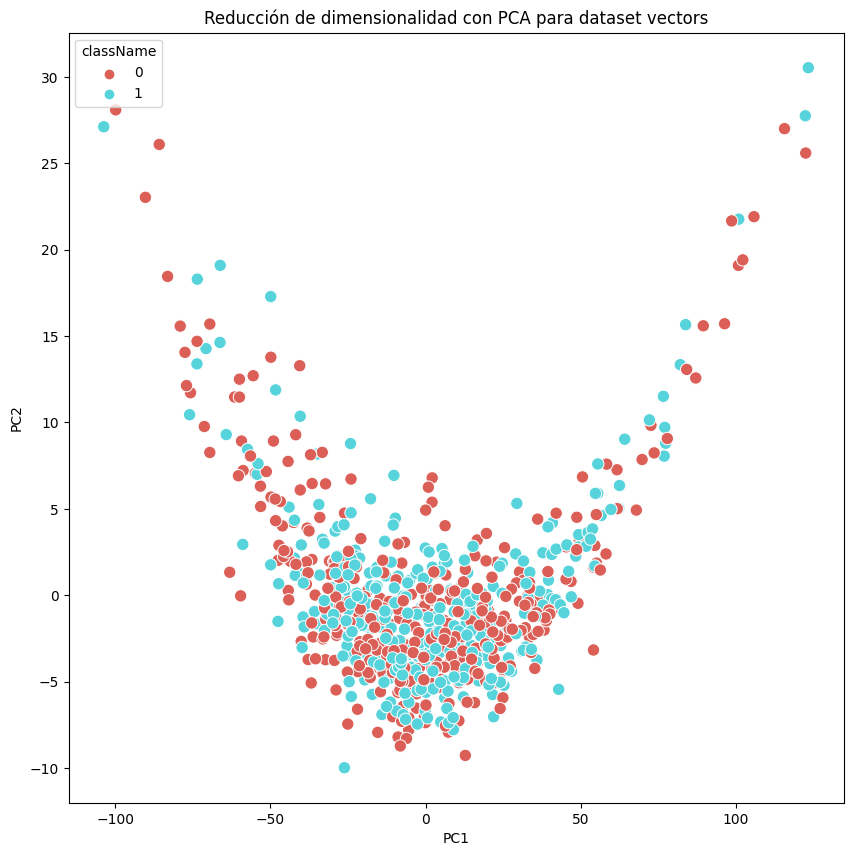

In [108]:
D = diag_prepro(diags_dict, use_selector = True, use_prominent = False, thresh = 40, use_scaler = True, use_padding = True)

lend = len(D)
perslay_parameters = load_architecture_params(weight="None", len_d = lend, layer= "Landscape", perm_op = "sum")
vectors = vector_representations(D, perslay_parameters)

vec_df = pd.DataFrame(vectors)

reduceDim(df=vec_df,target=labs_df['label'], method_class=PCA, df_name='vectors')

In [ ]:
pca = PCA(1)

In [ ]:
first = pca.fit_transform(vec_df)

In [ ]:
first = first.reshape((len(first)))

In [ ]:
first_df = pd.DataFrame({'first':first, 'labs':train_labels})

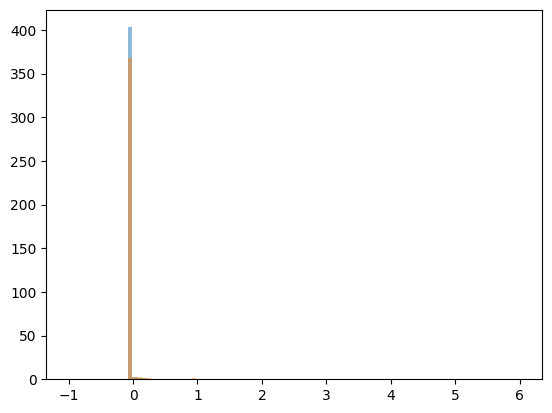

In [ ]:
bins = np.linspace(-1, 6, 100)
plt.hist(first_df[first_df['labs']==0]['first'], bins, alpha=0.5, label='x')
plt.hist(first_df[first_df['labs']==1]['first'], bins, alpha=0.5, label='y')
plt.show()

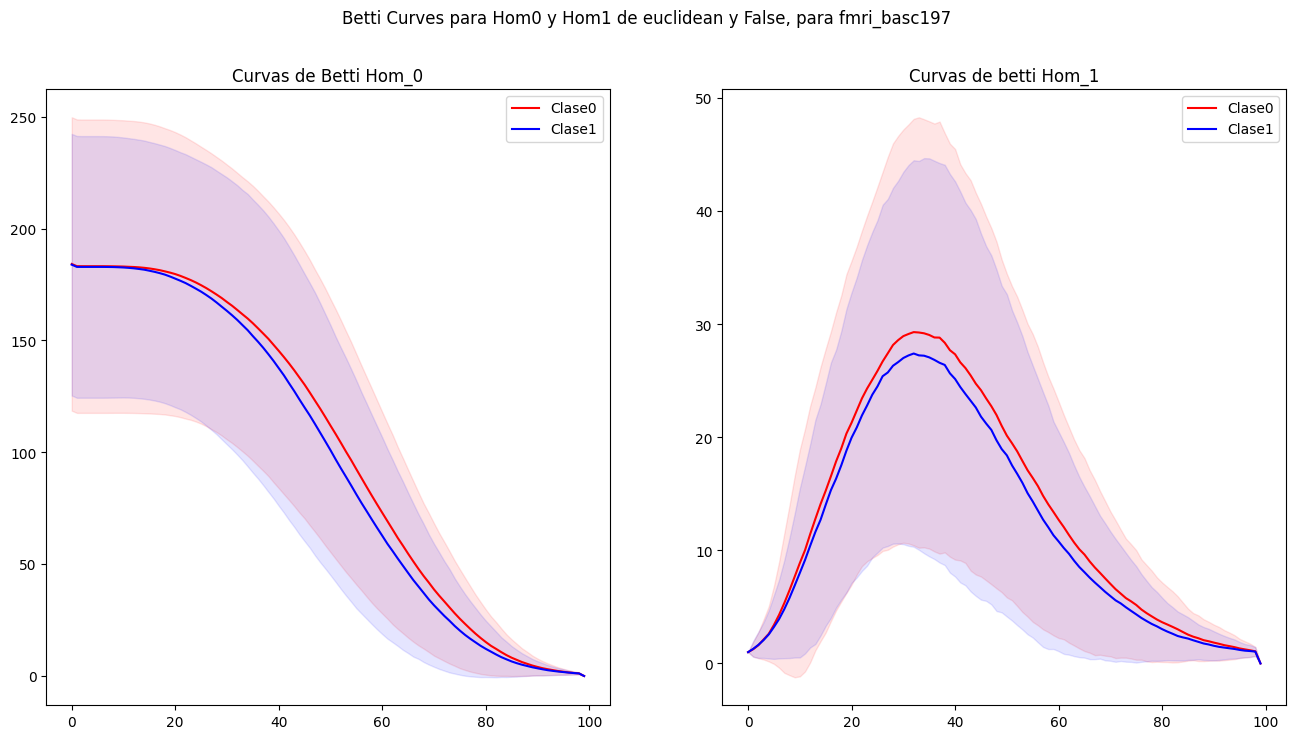

In [ ]:
matrixes = ['euclidean']#['correlation', 'partial correlation', 'tangent']
distances = [False] #['cosine', 'dynamic']
parc_id = 'fmri_basc197'

for tipo_mat in matrixes:
  for tipo_dist in distances:
    path = 'train/prueba_semana26/train_dgms_' + tipo_mat + '_' + str(tipo_dist) +'_' + parc_id + '.pkl'
    with open(path, 'rb') as handle:
        dgms = pkl.load(handle)

    betti_curves_h0, betti_curves_h1 = diag_to_betti(dgms)
    
    betti_df = pd.DataFrame(betti_curves_h0)
    betti_df['labels']= train_labels

    betti_stats_df = betti_df.groupby(betti_df.labels).mean().T
    betti_stats_df.columns = ['mean0', 'mean1']
    betti_stats_df[['std0', 'std1']] = betti_df.groupby(betti_df.labels).std().T

    under_line0 = betti_stats_df['mean0']-betti_stats_df['std0']
    over_line0 = betti_stats_df['mean0']+betti_stats_df['std0']
    under_line1 = betti_stats_df['mean1']-betti_stats_df['std1']
    over_line1 = betti_stats_df['mean1']+betti_stats_df['std1']

    index = np.array(betti_stats_df['mean0'].index, dtype=float)

    ds0 = pd.Series(betti_stats_df['mean0'])
    ds1 = pd.Series(betti_stats_df['mean1'])

    # DF hom1
    betti_df1 = pd.DataFrame(betti_curves_h1)
    betti_df1['labels']= train_labels

    betti_stats_df1 = betti_df1.groupby(betti_df1.labels).mean().T
    betti_stats_df1.columns = ['mean0', 'mean1']
    betti_stats_df1[['std0', 'std1']] = betti_df1.groupby(betti_df1.labels).std().T

    under_line01 = betti_stats_df1['mean0']-betti_stats_df1['std0']
    over_line01 = betti_stats_df1['mean0']+betti_stats_df1['std0']
    under_line11 = betti_stats_df1['mean1']-betti_stats_df1['std1']
    over_line11 = betti_stats_df1['mean1']+betti_stats_df1['std1']

    index1 = np.array(betti_stats_df1['mean0'].index, dtype=float)

    ds01 = pd.Series(betti_stats_df1['mean0'])
    ds11 = pd.Series(betti_stats_df1['mean1'])

    tit = f'Betti Curves para Hom0 y Hom1 de {tipo_mat} y {tipo_dist}, para {parc_id}'
    plotting(tit)

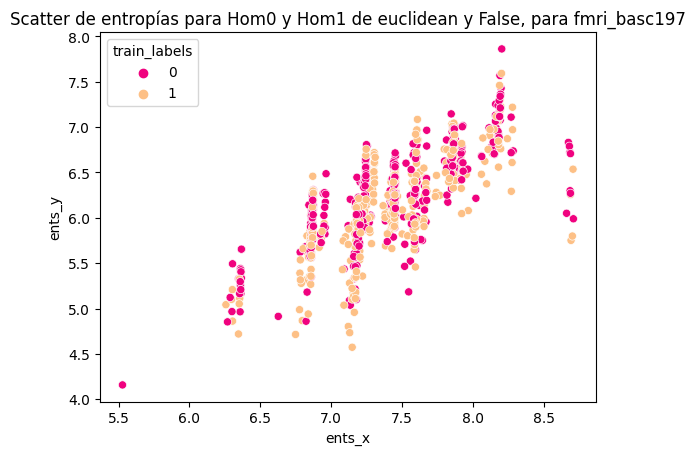

In [ ]:
matrixes = ['euclidean']#['correlation', 'partial correlation', 'tangent']
distances = [False]#['cosine', 'dynamic']
parc_id = 'fmri_basc197'

for tipo_mat in matrixes:
  for tipo_dist in distances:
    path = 'train/prueba_semana26/train_dgms_' + tipo_mat + '_' +str(tipo_dist) +'_' + parc_id + '.pkl'
    with open(path, 'rb') as handle:
        dgms = pkl.load(handle)
    ents_x, ents_y = diag_to_entropy2d(dgms)
    ents_df = pd.DataFrame({'ents_x':ents_x, 'ents_y':ents_y, 'train_labels':train_labels})
    sns.scatterplot(data=ents_df, x='ents_x', y='ents_y',
                        palette=sns.color_palette("Accent_r", 2),
                        hue= "train_labels",
                        s=35)
    plt.title(f'Scatter de entropías para Hom0 y Hom1 de {tipo_mat} y {tipo_dist}, para {parc_id}')
    plt.show()


## Diferentes diags prepro

Varianza explicada [0.88521993 0.11470695]
Varianza explicada total 0.99992687


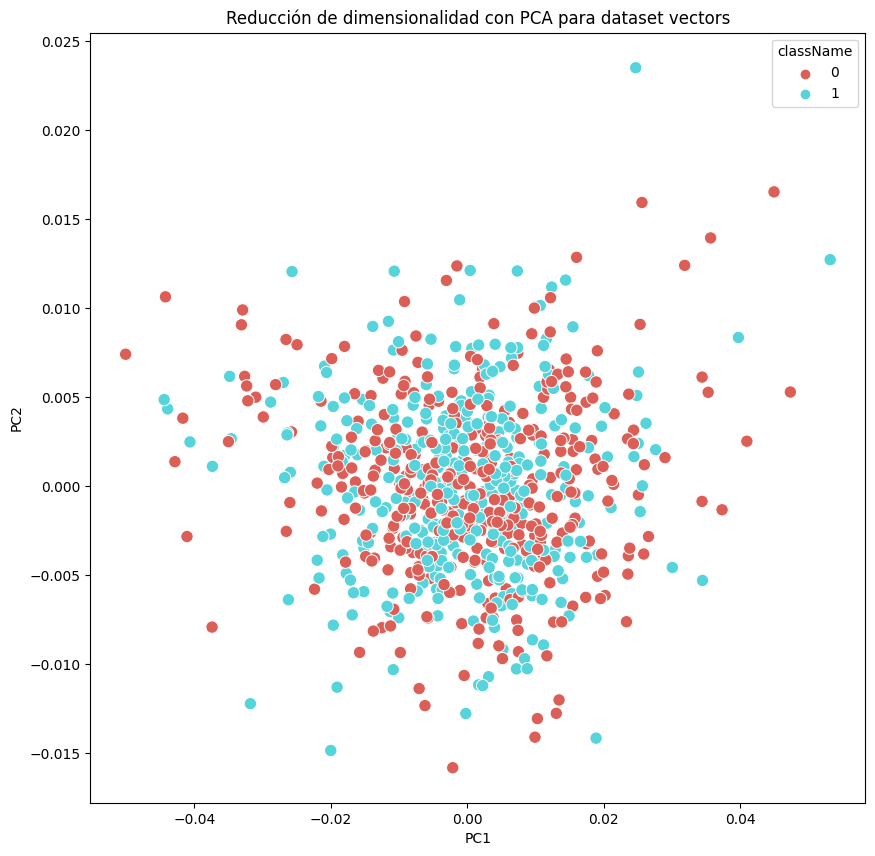

In [36]:
D = diag_prepro(diags_dict, use_selector = True, use_prominent = True, thresh = 20, use_scaler = False, use_padding = True)

lend = len(D)
perslay_parameters = load_architecture_params(weight="gmix", len_d = lend, layer= "Image", perm_op = "mean")
vectors = vector_representations(D, perslay_parameters)

vec_df = pd.DataFrame(vectors)

reduceDim(df=vec_df,target=labs_df['label'], method_class=PCA, df_name='vectors')

# Generated Series Betti

In [45]:
#import numpy as np
#!pip install neurodsp
#from neurodsp import sim
#from neurodsp.utils import create_times

def gen_series_tipo1(channels = 100, length = 30):
  indices = list(range(channels))
  np.random.shuffle(indices)
  freq = np.random.choice([7,10,15])
  expp = np.random.choice([-0.1,-0.5,-1,-1.5])
  components = {
      'sim_oscillation' : {'freq' : freq},
      'sim_powerlaw' : {'exponent' : expp}
  }
  expon = np.random.choice([0.5,1,2,3,4,5])
  SIM = [np.nan]*channels
  for i in range(channels):
    if i < channels//2:
      series = sim.sim_combined(n_seconds=length, fs=1, components=components)*i
      series += np.random.normal(0,expon,size = 30)
      SIM[indices[i]] = list(series)
    else:
      series = np.random.normal(0,1, size = (1,length))
      SIM[indices[i]] = list(series[0])
  return SIM

def gen_series_tipo2(channels = 100, length = 30):
  indices = list(range(channels))
  np.random.shuffle(indices)
  power = np.random.choice([-1,-2,-3,-4])
  expon = np.random.choice([0.5,1,2,3,4,5])
  SIM = [np.nan]*channels
  for i in range(channels):
    if i < channels//2:
      series = sim.sim_powerlaw(n_seconds=length, fs=1, exponent=power)*i
      series += np.random.normal(0,expon,size = 30)
      SIM[indices[i]] = list(series)
    else:
      expon2 = np.random.choice([0.5,1,2,3])
      series = np.random.normal(0,expon2, size = (1,length))
      SIM[indices[i]] = list(series[0])
  return SIM

In [51]:
SIM = gen_series_tipo1()

In [52]:
SIM = np.array(SIM)

In [140]:
lista_generada = []
train_labels = []

each  = 100
for i in range(each):
  lista_generada.append(np.array(gen_series_tipo1()))
  train_labels.append(0)

for i in range(each):
  lista_generada.append(np.array(gen_series_tipo2()))
  train_labels.append(1)

In [100]:
mats = gen_matrices(lista_generada, tipo_matriz='tangent', as_distance = 'cosine', keep_pvalue = 1)

dgms = []
Len = len(mats)
for i in range(Len):
  dgm = ripser_diagram(mats[i])
  dgms.append(dgm)

maxlen = 2
curves = gtd.BettiCurve()
betti_curves_h0 = []
betti_curves_h1 = []
for i in range(len(dgms)):
  if len(dgms[i][0]) == 0:
    complete_diagram =  np.vstack((np.hstack(([[0,0]], [[0]]*1),np.hstack((dgms[i][1], [[1]]*len(dgms[i][1]))))))
  elif len(dgms[i][1]) == 0:
    complete_diagram =  np.vstack((np.hstack((dgms[i][0], [[0]]*len(dgms[i][0]))),np.hstack(([[0,0]], [[1]]*1))))
  else: 
    complete_diagram =  np.vstack((np.hstack((dgms[i][0], [[0]]*len(dgms[i][0]))),np.hstack((dgms[i][1], [[1]]*len(dgms[i][1])))))
  complete_diagram[complete_diagram == np.inf] = maxlen
  betti_curv = curves.fit_transform([complete_diagram])
  betti_curves_h0.append(betti_curv[0][0].tolist())
  betti_curves_h1.append(betti_curv[0][1].tolist())


In [101]:
betti_df = pd.DataFrame(betti_curves_h0)
betti_df['labels']= train_labels

betti_stats_df = betti_df.groupby(betti_df.labels).mean().T
betti_stats_df.columns = ['mean0', 'mean1']
betti_stats_df[['std0', 'std1']] = betti_df.groupby(betti_df.labels).std().T

under_line0 = betti_stats_df['mean0']-betti_stats_df['std0']
over_line0 = betti_stats_df['mean0']+betti_stats_df['std0']
under_line1 = betti_stats_df['mean1']-betti_stats_df['std1']
over_line1 = betti_stats_df['mean1']+betti_stats_df['std1']

index = np.array(betti_stats_df['mean0'].index, dtype=float)

ds0 = pd.Series(betti_stats_df['mean0'])
ds1 = pd.Series(betti_stats_df['mean1'])

# DF hom1
betti_df1 = pd.DataFrame(betti_curves_h1)
betti_df1['labels']= train_labels

betti_stats_df1 = betti_df1.groupby(betti_df1.labels).mean().T
betti_stats_df1.columns = ['mean0', 'mean1']
betti_stats_df1[['std0', 'std1']] = betti_df1.groupby(betti_df1.labels).std().T

under_line01 = betti_stats_df1['mean0']-betti_stats_df1['std0']
over_line01 = betti_stats_df1['mean0']+betti_stats_df1['std0']
under_line11 = betti_stats_df1['mean1']-betti_stats_df1['std1']
over_line11 = betti_stats_df1['mean1']+betti_stats_df1['std1']

index1 = np.array(betti_stats_df1['mean0'].index, dtype=float)

ds01 = pd.Series(betti_stats_df1['mean0'])
ds11 = pd.Series(betti_stats_df1['mean1'])

In [84]:
def plotting(title):
  fig, ax = plt.subplots(1, 2, figsize=(16,8))

  ax[0].plot(ds0, label='Clase0', color = 'red')
  ax[0].plot(ds1, label='Clase1', color = 'b')
  ax[0].fill_between(index, under_line0, over_line0, color='r', alpha=.1)
  ax[0].fill_between(index, under_line1, over_line1, color='b', alpha=.1)
  ax[0].title.set_text('Curvas de Betti Hom_0')
  ax[0].legend()

  ax[1].plot(ds01, label='Clase0', color = 'red')
  ax[1].plot(ds11, label='Clase1', color = 'b')
  ax[1].fill_between(index, under_line01, over_line01, color='r', alpha=.1)
  ax[1].fill_between(index, under_line11, over_line11, color='b', alpha=.1)
  ax[1].title.set_text('Curvas de betti Hom_1')
  ax[1].legend()

  fig.suptitle(title)
  plt.show()

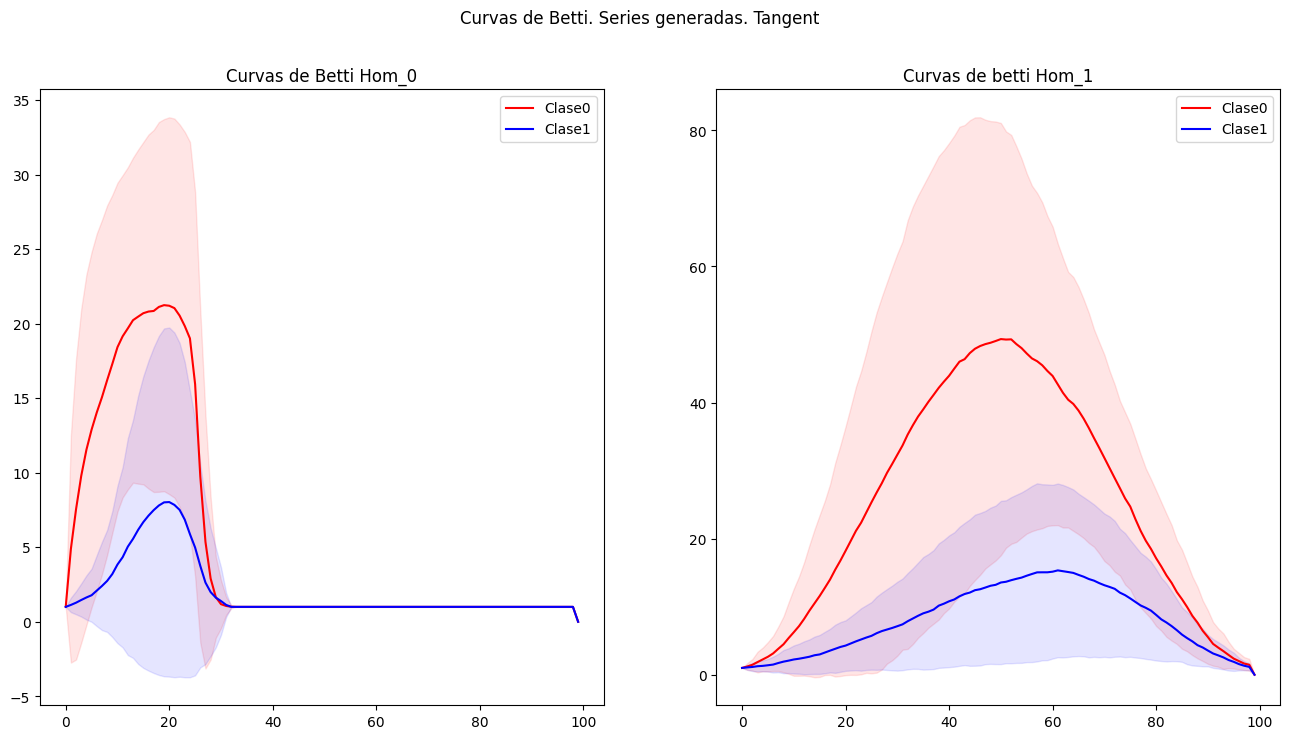

In [102]:
plotting('Curvas de Betti. Series generadas. Tangent')

# Indices subset Betti curves

In [111]:
indices = [759,54,757,24,499,141,655,263,174,754,538,451,500,559,418,431,324,472,540,612]

In [109]:
len(mats)

788

In [113]:
filtered_mats = []
for k in indices:
  filtered_mats.append(mats[k])

In [114]:
dgms = []
Len = len(filtered_mats)
for i in range(Len):
  dgm = ripser_diagram(filtered_mats[i])
  dgms.append(dgm)

maxlen = 2
curves = gtd.BettiCurve()
betti_curves_h0 = []
betti_curves_h1 = []
for i in range(len(dgms)):
  if len(dgms[i][0]) == 0:
    complete_diagram =  np.vstack((np.hstack(([[0,0]], [[0]]*1),np.hstack((dgms[i][1], [[1]]*len(dgms[i][1]))))))
  elif len(dgms[i][1]) == 0:
    complete_diagram =  np.vstack((np.hstack((dgms[i][0], [[0]]*len(dgms[i][0]))),np.hstack(([[0,0]], [[1]]*1))))
  else: 
    complete_diagram =  np.vstack((np.hstack((dgms[i][0], [[0]]*len(dgms[i][0]))),np.hstack((dgms[i][1], [[1]]*len(dgms[i][1])))))
  complete_diagram[complete_diagram == np.inf] = maxlen
  betti_curv = curves.fit_transform([complete_diagram])
  betti_curves_h0.append(betti_curv[0][0].tolist())
  betti_curves_h1.append(betti_curv[0][1].tolist())


In [122]:
betti_df = pd.DataFrame(betti_curves_h0)
betti_df['labels']= labs_df.iloc[indices].values

betti_stats_df = betti_df.groupby(betti_df.labels).mean().T
betti_stats_df.columns = ['mean0', 'mean1']
betti_stats_df[['std0', 'std1']] = betti_df.groupby(betti_df.labels).std().T

under_line0 = betti_stats_df['mean0']-betti_stats_df['std0']
over_line0 = betti_stats_df['mean0']+betti_stats_df['std0']
under_line1 = betti_stats_df['mean1']-betti_stats_df['std1']
over_line1 = betti_stats_df['mean1']+betti_stats_df['std1']

index = np.array(betti_stats_df['mean0'].index, dtype=float)

ds0 = pd.Series(betti_stats_df['mean0'])
ds1 = pd.Series(betti_stats_df['mean1'])

# DF hom1
betti_df1 = pd.DataFrame(betti_curves_h1)
betti_df1['labels']= labs_df.iloc[indices].values

betti_stats_df1 = betti_df1.groupby(betti_df1.labels).mean().T
betti_stats_df1.columns = ['mean0', 'mean1']
betti_stats_df1[['std0', 'std1']] = betti_df1.groupby(betti_df1.labels).std().T

under_line01 = betti_stats_df1['mean0']-betti_stats_df1['std0']
over_line01 = betti_stats_df1['mean0']+betti_stats_df1['std0']
under_line11 = betti_stats_df1['mean1']-betti_stats_df1['std1']
over_line11 = betti_stats_df1['mean1']+betti_stats_df1['std1']

index1 = np.array(betti_stats_df1['mean0'].index, dtype=float)

ds01 = pd.Series(betti_stats_df1['mean0'])
ds11 = pd.Series(betti_stats_df1['mean1'])

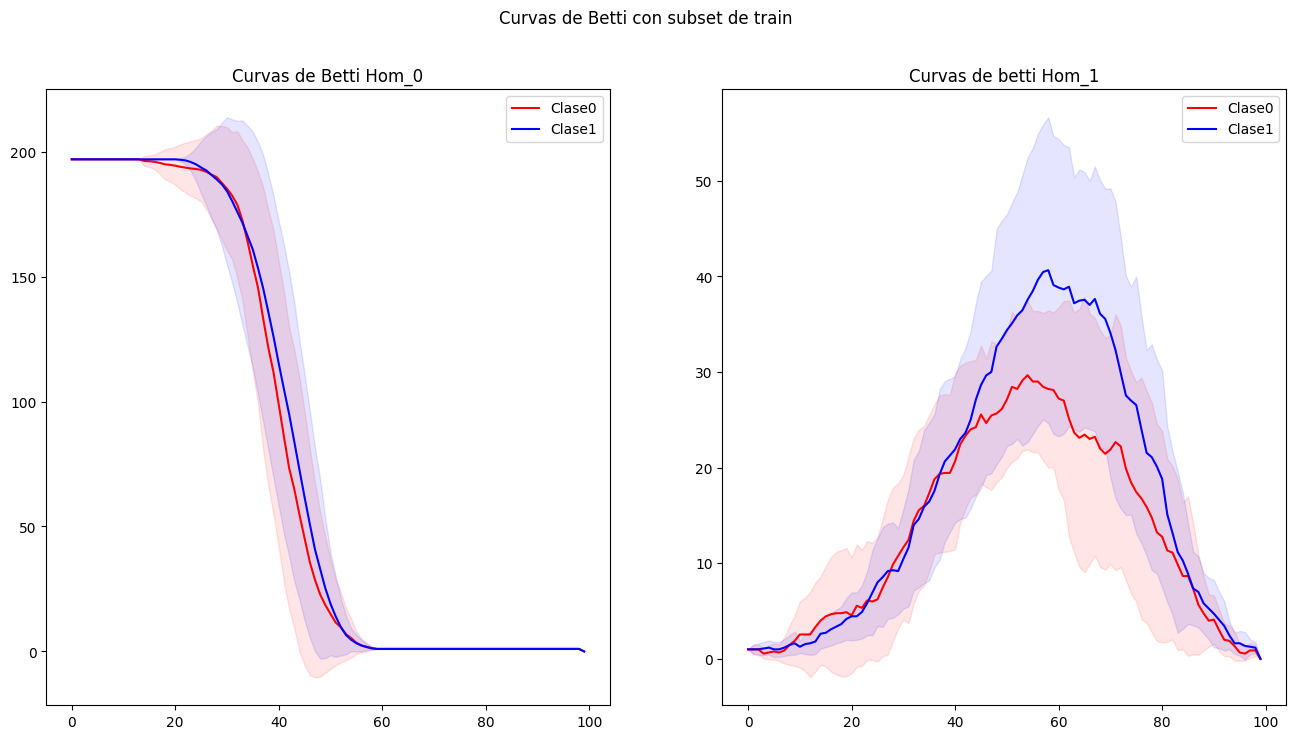

In [125]:
plotting('Curvas de Betti con subset de train')

# Entropías

In [127]:
ents_x, ents_y = diag_to_entropy2d(dgms)

In [137]:
lab = [k[0] for k in labs_df.iloc[indices].values]

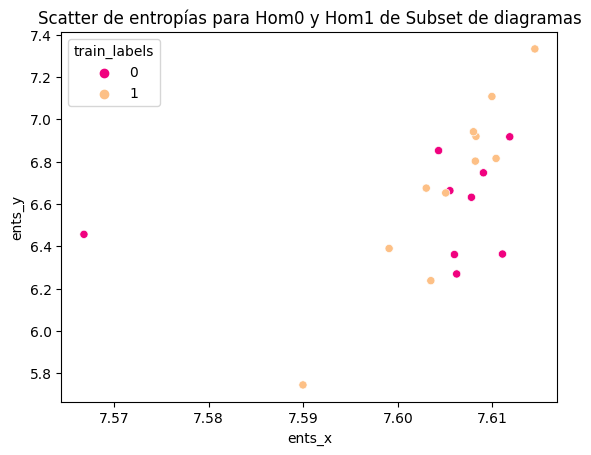

In [139]:
ents_df = pd.DataFrame({'ents_x':ents_x, 'ents_y':ents_y, 'train_labels':lab})
sns.scatterplot(data=ents_df, x='ents_x', y='ents_y',
                    palette=sns.color_palette("Accent_r", 2),
                    hue= "train_labels",
                    s=35)
plt.title(f'Scatter de entropías para Hom0 y Hom1 de Subset de diagramas')
plt.show()

In [141]:
lista_generada = []
train_labels = []

each  = 100
for i in range(each):
  lista_generada.append(np.array(gen_series_tipo1()))
  train_labels.append(0)

for i in range(each):
  lista_generada.append(np.array(gen_series_tipo2()))
  train_labels.append(1)
  
mats = gen_matrices(lista_generada, tipo_matriz='tangent', as_distance = 'cosine', keep_pvalue = 1)

dgms = []
Len = len(mats)
for i in range(Len):
  dgm = ripser_diagram(mats[i])
  dgms.append(dgm)

In [142]:
ents_x, ents_y = diag_to_entropy2d(dgms)

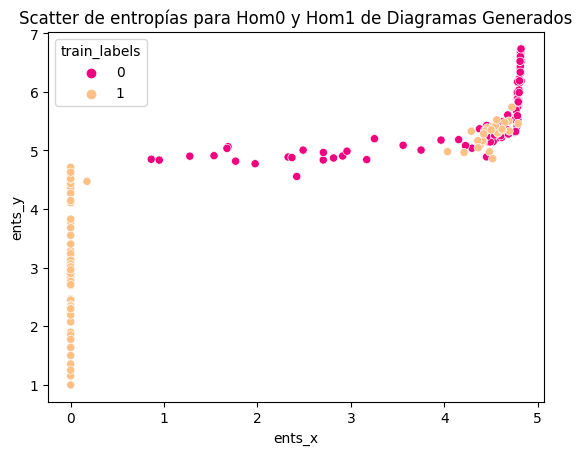

In [144]:
ents_df = pd.DataFrame({'ents_x':ents_x, 'ents_y':ents_y, 'train_labels':train_labels})
sns.scatterplot(data=ents_df, x='ents_x', y='ents_y',
                    palette=sns.color_palette("Accent_r", 2),
                    hue= "train_labels",
                    s=35)
plt.title(f'Scatter de entropías para Hom0 y Hom1 de Diagramas Generados')
plt.show()